# **<center>Unlocking Business Potential through 2019 Transactional Data</center>**


##  Business Understanding


**Introduction**

Businesses look for meaningful insights in today's data-driven environment to make wise decisions and propel success. This project aims to analyze and derive meaningful information from a comprehensive dataset related to sales transactions. By employing various data analysis and visualization techniques, we aim to uncover patterns, trends, and valuable insights that can contribute to strategic business decisions.

**Objective**

The primary objective of this project is to explore the sales dataset, unraveling hidden patterns and relationships within the data. Through a combination of statistical analysis and data visualization, we intend to identify key factors influencing sales performance, understand product-level dynamics, and explore the impact of various variables on the overall revenue. The insights gained will not only enhance our understanding of the business but also provide actionable recommendations for optimization.

**Goal**

The main goal of this project is to empower stakeholders with actionable insights that can drive strategic decision-making. By examining the historical sales data, we aim to answer critical questions, such as identifying the best and worst-seling products, understanding seasonal trends in sales, and assessing the correlation between different variables. 

###  **Hypothesis**

**Null hypothesis (H0):** Quantity Ordered, Price Each have significant effect on Sales

**Alternate hypothesis (H1):** Quantity Ordered, Price Each do not have significant effect on Sales


### Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

### Install required packages

In [157]:
#Libraries for sql
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#libraries for visulation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import statsmodels.api as sm
offline.init_notebook_mode(connected=True) # Configure Plotly to run 

#hypthesis testing
import scipy.stats as stats


### Create a connection by accessing connection string with defined environment variables


In [17]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [18]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("user")
password = environment_variables.get("password")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [19]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [20]:
# Now the sql query to get the data is what what you see below. 
query_jul = "Select * from dbo.Sales_July_2019"
query_aug = "Select * from dbo.Sales_August_2019"
query_sep = "Select * from dbo.Sales_September_2019"
query_oct = "Select * from dbo.Sales_October_2019"
query_nov = "Select * from dbo.Sales_November_2019"
query_dec = "Select * from dbo.Sales_December_2019"


## Data Understanding

**Data Sources**

The dataset for this project is sourced from two different locations. The first six months of data have been extracted from OneDrive, while the subsequent six months come from a database. For ease of access, both datasets are available in our GitHub repositories.


**Data Overview**

The dataset consists of sales transaction records spanning a year, with information captured across various columns. Here is an overview of the key columns and their descriptions:

**Order ID**: number to represent customer ID

**Product**:Type of Product

**Quantity_Ordered**: Number of products ordered

**Price_Each**: Price of each product

**Order_Date**: Date product was ordered

**Purchase Address**: Address product was purchased


Understanding the structure and content of these columns is essential for performing insightful analyses to uncover patterns, trends, and meaningful insights related to sales performance.

**Data Loading**

We loaded the monthly sales datasets for January to June from CSV files and for July to December from a database.

In [21]:
##load datasets in csv
df_jan=pd.read_csv("Sales_January_2019.csv")
df_feb=pd.read_csv("Sales_February_2019.csv")
df_mar=pd.read_csv("Sales_March_2019.csv")
df_apr=pd.read_csv("Sales_April_2019.csv")
df_may=pd.read_csv("Sales_May_2019.csv")
df_jun=pd.read_csv("Sales_June_2019.csv")

#load datasets in database
df_jul=pd.read_sql(query_jul,connection)
df_aug=pd.read_sql(query_aug,connection)
df_sep=pd.read_sql(query_sep,connection)
df_oct=pd.read_sql(query_oct,connection)
df_nov=pd.read_sql(query_nov,connection)
df_dec=pd.read_sql(query_dec,connection)

We exported each DataFrame to a CSV file with the specified file names. The index=False argument ensures that the index column is not saved to the CSV file.

In [22]:
#we will put convert the dataset in the database to csv
df_jul.to_csv("July Sales.csv",index=False)
df_aug.to_csv("August Sales.csv",index=False)
df_sep.to_csv("September Sales.csv",index=False)
df_oct.to_csv("october Sales.csv",index=False)
df_nov.to_csv("November Sales.csv",index=False)
df_dec.to_csv("December Sales.csv",index=False)

## View datasets
View datasets from January to December

In [23]:
#view january dataset
df_jan.head()

Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301

In [24]:
#view february dataset
df_feb.head()

Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1       3.84   
2   150504    27in 4K Gaming Monitor                1     389.99   
3   150505  Lightning Charging Cable                1      14.95   
4   150506     AA Batteries (4-pack)                2       3.84   

       Order Date                     Purchase Address  
0  02/18/19 01:35    866 Spruce St, Portland, ME 04101  
1  02/13/19 07:24  18 13th St, San Francisco, CA 94016  
2  02/18/19 09:46   52 6th St, New York City, NY 10001  
3  02/02/19 16:47     129 Cherry St, Atlanta, GA 30301  
4  02/28/19 20:32    548 Lincoln St, Seattle, WA 98101

In [25]:
#view march
df_mar.head()

Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address  
0  03/28/19 20:59       942 Church St, Austin, TX 73301  
1  03/28/19 20:59       942 Church St, Austin, TX 73301  
2  03/28/19 20:59       942 Church St, Austin, TX 73301  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016

In [26]:
#view april
df_apr.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

In [27]:
#view may
df_may.head()

Order ID                 Product Quantity Ordered Price Each  \
0   194095        Wired Headphones                1      11.99   
1   194096   AA Batteries (4-pack)                1       3.84   
2   194097        27in FHD Monitor                1     149.99   
3   194098        Wired Headphones                1      11.99   
4   194099  AAA Batteries (4-pack)                2       2.99   

       Order Date                         Purchase Address  
0  05/16/19 17:14      669 2nd St, New York City, NY 10001  
1  05/19/19 14:43          844 Walnut St, Dallas, TX 75001  
2  05/24/19 11:36  164 Madison St, New York City, NY 10001  
3  05/02/19 20:40          622 Meadow St, Dallas, TX 75001  
4  05/11/19 22:55          17 Church St, Seattle, WA 98101

In [28]:
#view june
df_jun.head()

Order ID                     Product Quantity Ordered Price Each  \
0   209921        USB-C Charging Cable                1      11.95   
1   209922          Macbook Pro Laptop                1     1700.0   
2   209923             ThinkPad Laptop                1     999.99   
3   209924            27in FHD Monitor                1     149.99   
4   209925  Bose SoundSport Headphones                1      99.99   

       Order Date                       Purchase Address  
0  06/23/19 19:34      950 Walnut St, Portland, ME 04101  
1  06/30/19 10:05     80 4th St, San Francisco, CA 94016  
2  06/24/19 20:18  402 Jackson St, Los Angeles, CA 90001  
3  06/05/19 10:21         560 10th St, Seattle, WA 98101  
4  06/25/19 18:58    545 2nd St, San Francisco, CA 94016

In [29]:
#view july
df_jul.head()

Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

                    Order_Date                  Purchase_Address  
0  2026-07-19 16:51:00.0000000   389 South St, Atlanta, GA 30301  
1  2005-07-19 08:55:00.0000000     590 4th St, Seattle, WA 98101  
2  2029-07-19 12:41:00.0000000    861 Hill St, Atlanta, GA 30301  
3  2028-07-19 10:15:00.0000000   190 Ridge St, Atlanta, GA 30301  
4  2031-07-19 02:13:00.0000000  824 Forest St, Seattle, WA 98101

In [30]:
#view august
df_aug.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0  236670.0            Wired Headphones               2.0   11.990000   
1  236671.0  Bose SoundSport Headphones               1.0   99.989998   
2  236672.0                      iPhone               1.0  700.000000   
3  236673.0       AA Batteries (4-pack)               2.0    3.840000   
4  236674.0       AA Batteries (4-pack)               2.0    3.840000   

                    Order_Date                      Purchase_Address  
0  2031-08-19 22:21:00.0000000      359 Spruce St, Seattle, WA 98101  
1  2015-08-19 15:11:00.0000000        492 Ridge St, Dallas, TX 75001  
2  2006-08-19 14:40:00.0000000        149 7th St, Portland, OR 97035  
3  2029-08-19 20:59:00.0000000     631 2nd St, Los Angeles, CA 90001  
4  2015-08-19 19:53:00.0000000  736 14th St, New York City, NY 10001

In [31]:
#view september
df_sep.head()

Order_ID                Product  Quantity_Ordered  Price_Each  \
0  248151.0  AA Batteries (4-pack)               4.0    3.840000   
1  248152.0   USB-C Charging Cable               2.0   11.950000   
2  248153.0   USB-C Charging Cable               1.0   11.950000   
3  248154.0       27in FHD Monitor               1.0  149.990005   
4  248155.0   USB-C Charging Cable               1.0   11.950000   

                    Order_Date                       Purchase_Address  
0  2017-09-19 14:44:00.0000000    380 North St, Los Angeles, CA 90001  
1  2029-09-19 10:19:00.0000000           511 8th St, Austin, TX 73301  
2  2016-09-19 17:48:00.0000000  151 Johnson St, Los Angeles, CA 90001  
3  2027-09-19 07:52:00.0000000      355 Hickory St, Seattle, WA 98101  
4  2001-09-19 19:03:00.0000000          125 5th St, Atlanta, GA 30301

In [32]:
#view october
df_oct.head()


Order_ID                 Product  Quantity_Ordered  Price_Each  \
0  259358.0  34in Ultrawide Monitor               1.0  379.989990   
1  259359.0  27in 4K Gaming Monitor               1.0  389.989990   
2  259360.0  AAA Batteries (4-pack)               2.0    2.990000   
3  259361.0        27in FHD Monitor               1.0  149.990005   
4  259362.0        Wired Headphones               1.0   11.990000   

                    Order_Date                           Purchase_Address  
0  2028-10-19 10:56:00.0000000            609 Cherry St, Dallas, TX 75001  
1  2028-10-19 17:26:00.0000000          225 5th St, Los Angeles, CA 90001  
2  2024-10-19 17:20:00.0000000       967 12th St, New York City, NY 10001  
3  2014-10-19 22:26:00.0000000  628 Jefferson St, New York City, NY 10001  
4  2007-10-19 16:10:00.0000000         534 14th St, Los Angeles, CA 90001

In [33]:
#view november
df_nov.head()


Order_ID                     Product  Quantity_Ordered  Price_Each  \
0  278797.0            Wired Headphones               1.0   11.990000   
1  278798.0        USB-C Charging Cable               2.0   11.950000   
2  278799.0    Apple Airpods Headphones               1.0  150.000000   
3  278800.0            27in FHD Monitor               1.0  149.990005   
4  278801.0  Bose SoundSport Headphones               1.0   99.989998   

                    Order_Date                      Purchase_Address  
0  2021-11-19 09:54:00.0000000   46 Park St, New York City, NY 10001  
1  2017-11-19 10:03:00.0000000      962 Hickory St, Austin, TX 73301  
2  2019-11-19 14:56:00.0000000  464 Cherry St, Los Angeles, CA 90001  
3  2025-11-19 22:24:00.0000000        649 10th St, Seattle, WA 98101  
4  2009-11-19 13:56:00.0000000         522 Hill St, Boston, MA 02215

In [34]:
#view december
df_dec.head()

Order_ID               Product  Quantity_Ordered   Price_Each  \
0  295665.0    Macbook Pro Laptop               1.0  1700.000000   
1  295666.0    LG Washing Machine               1.0   600.000000   
2  295667.0  USB-C Charging Cable               1.0    11.950000   
3  295668.0      27in FHD Monitor               1.0   149.990005   
4  295669.0  USB-C Charging Cable               1.0    11.950000   

                    Order_Date                        Purchase_Address  
0  2030-12-19 00:01:00.0000000  136 Church St, New York City, NY 10001  
1  2029-12-19 07:03:00.0000000     562 2nd St, New York City, NY 10001  
2  2012-12-19 18:21:00.0000000    277 Main St, New York City, NY 10001  
3  2022-12-19 15:13:00.0000000     410 6th St, San Francisco, CA 94016  
4  2018-12-19 12:38:00.0000000           43 Hill St, Atlanta, GA 30301

## **Exploratory Data Analysis**

We performed Exploratory Data Analysis (EDA) to understand our sales dataset spanning from January to December to uncover patterns, trends, and potential insights. 


## Data Overview

#### Data info
Here we want to check the information the dataset contains

In [35]:
#january dataset info
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


**Observation on January dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 9723 enteries but each column has 9697 indicating presence of missing values

In [36]:
#february info
df_feb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
dtypes: object(6)
memory usage: 564.3+ KB


**Observation on February dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 12036 enteries but each column has 12004 indicating presence of missing values

In [37]:
#view info for march dataset
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


**Observation on March dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 15226 enteries but each column has 15189 indicating presence of missing values

In [38]:
#info for april
df_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


**Observation on April dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 18383 enteries but each column has 18324 indicating presence of missing values

In [39]:
#view may info
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          16587 non-null  object
 1   Product           16587 non-null  object
 2   Quantity Ordered  16587 non-null  object
 3   Price Each        16587 non-null  object
 4   Order Date        16587 non-null  object
 5   Purchase Address  16587 non-null  object
dtypes: object(6)
memory usage: 779.9+ KB


**Observation on May dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 16635 enteries but each column has 16587 indicating presence of missing values

In [40]:
#view june info
df_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          13579 non-null  object
 1   Product           13579 non-null  object
 2   Quantity Ordered  13579 non-null  object
 3   Price Each        13579 non-null  object
 4   Order Date        13579 non-null  object
 5   Purchase Address  13579 non-null  object
dtypes: object(6)
memory usage: 638.7+ KB


**Observation on June dataset**

- All columns have the data type 'object,' which suggest that some columns (Order id, Quantity_ordered, Order date and Price each) need conversion to more appropriate types 

- There are 13622 enteries but each column has 13579 indicating presence of missing values

In [41]:
#view info of july dataset
df_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          14291 non-null  float64
 1   Product           14326 non-null  object 
 2   Quantity_Ordered  14291 non-null  float64
 3   Price_Each        14291 non-null  float64
 4   Order_Date        14291 non-null  object 
 5   Purchase_Address  14326 non-null  object 
dtypes: float64(3), object(3)
memory usage: 673.8+ KB


**Observation on july dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 14371 enteries but each column have enteries not up to the total indicating the presence of missing values

In [42]:
#view info for august dataset
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          11957 non-null  float64
 1   Product           11983 non-null  object 
 2   Quantity_Ordered  11957 non-null  float64
 3   Price_Each        11957 non-null  float64
 4   Order_Date        11957 non-null  object 
 5   Purchase_Address  11983 non-null  object 
dtypes: float64(3), object(3)
memory usage: 563.1+ KB


**Observation on august dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 12011 enteries but each column have enteries not up to the total indicating presence of missing values

In [43]:
#view september info
df_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          11629 non-null  float64
 1   Product           11646 non-null  object 
 2   Quantity_Ordered  11629 non-null  float64
 3   Price_Each        11629 non-null  float64
 4   Order_Date        11629 non-null  object 
 5   Purchase_Address  11646 non-null  object 
dtypes: float64(3), object(3)
memory usage: 547.9+ KB


**Observation on September dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 11686 enteries but each column have enteries not up to the total indicating presence of missing values

In [44]:
#view october info
df_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          20284 non-null  float64
 1   Product           20317 non-null  object 
 2   Quantity_Ordered  20284 non-null  float64
 3   Price_Each        20284 non-null  float64
 4   Order_Date        20284 non-null  object 
 5   Purchase_Address  20317 non-null  object 
dtypes: float64(3), object(3)
memory usage: 955.4+ KB


**Observation on october dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 20379 enteries but each column have enteries not up to the total indicating presence of missing values

In [45]:
#view november info
df_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          17580 non-null  float64
 1   Product           17616 non-null  object 
 2   Quantity_Ordered  17580 non-null  float64
 3   Price_Each        17580 non-null  float64
 4   Order_Date        17580 non-null  object 
 5   Purchase_Address  17616 non-null  object 
dtypes: float64(3), object(3)
memory usage: 828.0+ KB


**Observation on November dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 17661 enteries but each column have enteries not up to the total indicating presence of missing values

In [46]:
#view december info
df_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          24989 non-null  float64
 1   Product           25037 non-null  object 
 2   Quantity_Ordered  24989 non-null  float64
 3   Price_Each        24989 non-null  float64
 4   Order_Date        24989 non-null  object 
 5   Purchase_Address  25037 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


**Observation on December dataset**

- Quantity_ordered, Order date, Order id need conversion to more appropriate types. With the quantity ordered,it is suppose to be an integer because, a customer cannot order a quantity in decimal hence will change the datatype.Same with order id it has to be an integer but not in float format. Order Date should also be in datetime format.

- There are 25117 enteries but each column have enteries not up to the total indicating presence of missing values

### **General Observations after checking info of the datasets**

- Across all 12 datasets representing the 12 months, there are inconsistencies in data types and missing values present.
- The first six months have the same data types across each month. The next six months also have the same data types across each month.
- The 'Purchase Address' column contains complete addresses, but we are interested in extracting only the cities from the data.
- Some columns in the last six months have underscores in their names, while others don't. We will rename them to maintain consistency in the the column names.

## Check for missing values

In [47]:
#view missing values in january
df_jan.isnull().sum()


Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [48]:
df_feb.isnull().sum()

Order ID            32
Product             32
Quantity Ordered    32
Price Each          32
Order Date          32
Purchase Address    32
dtype: int64

In [49]:
df_mar.isnull().sum()

Order ID            37
Product             37
Quantity Ordered    37
Price Each          37
Order Date          37
Purchase Address    37
dtype: int64

In [50]:
df_apr.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [51]:
df_may.isnull().sum()

Order ID            48
Product             48
Quantity Ordered    48
Price Each          48
Order Date          48
Purchase Address    48
dtype: int64

In [52]:
df_jun.isnull().sum()

Order ID            43
Product             43
Quantity Ordered    43
Price Each          43
Order Date          43
Purchase Address    43
dtype: int64

In [53]:
df_jul.isnull().sum()

Order_ID            80
Product             45
Quantity_Ordered    80
Price_Each          80
Order_Date          80
Purchase_Address    45
dtype: int64

In [54]:
df_aug.isnull().sum()

Order_ID            54
Product             28
Quantity_Ordered    54
Price_Each          54
Order_Date          54
Purchase_Address    28
dtype: int64

In [55]:
df_sep.isnull().sum()

Order_ID            57
Product             40
Quantity_Ordered    57
Price_Each          57
Order_Date          57
Purchase_Address    40
dtype: int64

In [56]:
df_oct.isnull().sum()

Order_ID            95
Product             62
Quantity_Ordered    95
Price_Each          95
Order_Date          95
Purchase_Address    62
dtype: int64

In [57]:
df_nov.isnull().sum()

Order_ID            81
Product             45
Quantity_Ordered    81
Price_Each          81
Order_Date          81
Purchase_Address    45
dtype: int64

In [58]:
df_dec.isnull().sum()

Order_ID            128
Product              80
Quantity_Ordered    128
Price_Each          128
Order_Date          128
Purchase_Address     80
dtype: int64

## Check for duplicates

In [59]:
#put datasets in a list
dataframes= [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Check for duplicated values in each DataFrame
for month, df in zip(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], dataframes):
    print(f"DataFrame {month}:")
    print(df.duplicated().sum())
    print("\n" + "=" * 50 + "\n")  # Separating each DataFrame's output


DataFrame January:
50


DataFrame February:
66


DataFrame March:
95


DataFrame April:
114


DataFrame May:
93


DataFrame June:
83


DataFrame July:
96


DataFrame August:
70


DataFrame September:
73


DataFrame October:
126


DataFrame November:
108


DataFrame December:
166




**Observation**

- There are duplicates in all the datasets, but before handling the duplicates further exploration will be done to see if they will be removed or maintained.

### **Renaming columns**

- We will rename some of the columns to achieve uniformity which is a good practice for consistency in our dataset. 
- The last six months have columns with different names than the first six months, therefore we will rename them accordingly to match the first six months. 



In [60]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address':'Purchase Address'
}

In [61]:
# Rename columns
for df in [df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]:
    df.rename(columns=new_column_names, inplace=True)

In [62]:
#view changes
df_jul.head()


Order ID                   Product  Quantity Ordered  Price Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

                    Order Date                  Purchase Address  
0  2026-07-19 16:51:00.0000000   389 South St, Atlanta, GA 30301  
1  2005-07-19 08:55:00.0000000     590 4th St, Seattle, WA 98101  
2  2029-07-19 12:41:00.0000000    861 Hill St, Atlanta, GA 30301  
3  2028-07-19 10:15:00.0000000   190 Ridge St, Atlanta, GA 30301  
4  2031-07-19 02:13:00.0000000  824 Forest St, Seattle, WA 98101

In [63]:
df_aug.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0  236670.0            Wired Headphones               2.0   11.990000   
1  236671.0  Bose SoundSport Headphones               1.0   99.989998   
2  236672.0                      iPhone               1.0  700.000000   
3  236673.0       AA Batteries (4-pack)               2.0    3.840000   
4  236674.0       AA Batteries (4-pack)               2.0    3.840000   

                    Order Date                      Purchase Address  
0  2031-08-19 22:21:00.0000000      359 Spruce St, Seattle, WA 98101  
1  2015-08-19 15:11:00.0000000        492 Ridge St, Dallas, TX 75001  
2  2006-08-19 14:40:00.0000000        149 7th St, Portland, OR 97035  
3  2029-08-19 20:59:00.0000000     631 2nd St, Los Angeles, CA 90001  
4  2015-08-19 19:53:00.0000000  736 14th St, New York City, NY 10001

- changes have taken effect

## Handling Missing Values

From our data overview, we noticed the presence of missing values. So will explore to view their content to either drop or maintain them

In [64]:
##view missing value in one month to elaborate
df_jan.isnull().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [65]:
#view the exact content of a column to show the missing value
df_jan[df_jan["Order ID"].isnull()]

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664       NaN     NaN              NaN        NaN        NaN              NaN
678       NaN     NaN              NaN        NaN        NaN              NaN
797       NaN     NaN              NaN        NaN        NaN              NaN
876       NaN     NaN              NaN        NaN        NaN              NaN
1299      NaN     NaN              NaN        NaN        NaN              NaN
1491      NaN     NaN              NaN        NaN        NaN              NaN
1699      NaN     NaN              NaN        NaN        NaN              NaN
3047      NaN     NaN              NaN        NaN        NaN              NaN
3082      NaN     NaN              NaN        NaN        NaN              NaN
3584      NaN     NaN              NaN        NaN        NaN              NaN
3659      NaN     NaN              NaN        NaN        NaN              NaN
4689      NaN     NaN              NaN        NaN        NaN              NaN
5061      NaN     NaN              NaN        NaN        NaN              NaN
5570      NaN     NaN              NaN        NaN        NaN              NaN
5607      NaN     NaN              NaN        NaN        NaN              NaN
6056      NaN     NaN              NaN        NaN        NaN              NaN
6504      NaN     NaN              NaN        NaN        NaN              NaN
6517      NaN     NaN              NaN        NaN        NaN              NaN
7855      NaN     NaN              NaN        NaN        NaN              NaN
8255      NaN     NaN              NaN        NaN        NaN              NaN
8257      NaN     NaN              NaN        NaN        NaN              NaN
8596      NaN     NaN              NaN        NaN        NaN              NaN
8623      NaN     NaN              NaN        NaN        NaN              NaN
9144      NaN     NaN              NaN        NaN        NaN              NaN
9631      NaN     NaN              NaN        NaN        NaN              NaN
9664      NaN     NaN              NaN        NaN        NaN              NaN

In [66]:
#view the exact content of a column to show the missing value
df_feb[df_feb["Order ID"].isnull()]

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
75         NaN     NaN              NaN        NaN        NaN              NaN
169        NaN     NaN              NaN        NaN        NaN              NaN
172        NaN     NaN              NaN        NaN        NaN              NaN
1488       NaN     NaN              NaN        NaN        NaN              NaN
1517       NaN     NaN              NaN        NaN        NaN              NaN
1774       NaN     NaN              NaN        NaN        NaN              NaN
1973       NaN     NaN              NaN        NaN        NaN              NaN
2027       NaN     NaN              NaN        NaN        NaN              NaN
2412       NaN     NaN              NaN        NaN        NaN              NaN
2532       NaN     NaN              NaN        NaN        NaN              NaN
2748       NaN     NaN              NaN        NaN        NaN              NaN
3118       NaN     NaN              NaN        NaN        NaN              NaN
3380       NaN     NaN              NaN        NaN        NaN              NaN
3703       NaN     NaN              NaN        NaN        NaN              NaN
4129       NaN     NaN              NaN        NaN        NaN              NaN
4403       NaN     NaN              NaN        NaN        NaN              NaN
4629       NaN     NaN              NaN        NaN        NaN              NaN
5724       NaN     NaN              NaN        NaN        NaN              NaN
5746       NaN     NaN              NaN        NaN        NaN              NaN
6036       NaN     NaN              NaN        NaN        NaN              NaN
6325       NaN     NaN              NaN        NaN        NaN              NaN
6842       NaN     NaN              NaN        NaN        NaN              NaN
6907       NaN     NaN              NaN        NaN        NaN              NaN
7334       NaN     NaN              NaN        NaN        NaN              NaN
7726       NaN     NaN              NaN        NaN        NaN              NaN
9074       NaN     NaN              NaN        NaN        NaN              NaN
9225       NaN     NaN              NaN        NaN        NaN              NaN
10163      NaN     NaN              NaN        NaN        NaN              NaN
11172      NaN     NaN              NaN        NaN        NaN              NaN
11388      NaN     NaN              NaN        NaN        NaN              NaN
11468      NaN     NaN              NaN        NaN        NaN              NaN
11973      NaN     NaN              NaN        NaN        NaN              NaN

### **Observations**

The above table shows missing values in a column cuts across the rest of the columns.This was also observed in the other months of the first 6 months that all had the same number of missing values

Therefore the missing values in these months will be dropped


### Dropping missing values in the first 6 months

In [67]:
#put the 1st 6 months in a list
dataframes = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun]

# Remove null values in each DataFrame
for month, df in zip(['January', 'February', 'March', 'April', 'May', 'June'], dataframes):
       # Remove null values
    df.dropna(inplace=True)
    
    print(f"DataFrame {month}:")
    
    # Print number of null values for each column
    for column in df.columns:
        print(f"Number of null values for {column}: {df[column].isnull().sum()}")
    
    print("\n" + "=" * 50 + "\n")  # Separating each DataFrame's output


DataFrame January:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame February:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame March:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame April:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null valu

## Comments
- The number of missing values in the first 6 months have been removed as shown above. We will proceed with the next 6 months

## Handling missing values in the next 6 months

As stated earlier the next 6 months have a trend in a way the missing values are allocated so we will view this and see how to handle it

In [68]:
##view the missing values content
df_jul[df_jul["Order ID"].isnull()]

Order ID  Product  Quantity Ordered  Price Each Order Date  \
199         NaN     None               NaN         NaN       None   
315         NaN     None               NaN         NaN       None   
599         NaN     None               NaN         NaN       None   
675         NaN     None               NaN         NaN       None   
775         NaN  Product               NaN         NaN       None   
1027        NaN     None               NaN         NaN       None   
1391        NaN  Product               NaN         NaN       None   
1438        NaN  Product               NaN         NaN       None   
1624        NaN  Product               NaN         NaN       None   
1666        NaN     None               NaN         NaN       None   
1720        NaN  Product               NaN         NaN       None   
2016        NaN     None               NaN         NaN       None   
2208        NaN     None               NaN         NaN       None   
2390        NaN     None               NaN         NaN       None   
2579        NaN  Product               NaN         NaN       None   
2631        NaN     None               NaN         NaN       None   
2951        NaN  Product               NaN         NaN       None   
3068        NaN     None               NaN         NaN       None   
3078        NaN     None               NaN         NaN       None   
3447        NaN  Product               NaN         NaN       None   
3493        NaN  Product               NaN         NaN       None   
3494        NaN     None               NaN         NaN       None   
3513        NaN  Product               NaN         NaN       None   
3647        NaN     None               NaN         NaN       None   
3672        NaN     None               NaN         NaN       None   
3686        NaN  Product               NaN         NaN       None   
3833        NaN  Product               NaN         NaN       None   
4177        NaN     None               NaN         NaN       None   
4494        NaN  Product               NaN         NaN       None   
4611        NaN     None               NaN         NaN       None   
4756        NaN     None               NaN         NaN       None   
4999        NaN     None               NaN         NaN       None   
5070        NaN  Product               NaN         NaN       None   
5158        NaN  Product               NaN         NaN       None   
5165        NaN  Product               NaN         NaN       None   
5657        NaN     None               NaN         NaN       None   
5856        NaN  Product               NaN         NaN       None   
5983        NaN     None               NaN         NaN       None   
6132        NaN     None               NaN         NaN       None   
6243        NaN     None               NaN         NaN       None   
6268        NaN     None               NaN         NaN       None   
6365        NaN     None               NaN         NaN       None   
6661        NaN     None               NaN         NaN       None   
6777        NaN     None               NaN         NaN       None   
6989        NaN     None               NaN         NaN       None   
7213        NaN  Product               NaN         NaN       None   
7539        NaN     None               NaN         NaN       None   
7798        NaN  Product               NaN         NaN       None   
7836        NaN     None               NaN         NaN       None   
8128        NaN  Product               NaN         NaN       None   
8160        NaN  Product               NaN         NaN       None   
8199        NaN     None               NaN         NaN       None   
8250        NaN  Product               NaN         NaN       None   
8260        NaN  Product               NaN         NaN       None   
8279        NaN  Product               NaN         NaN       None   
8621        NaN     None               NaN         NaN       None   
8650        NaN  Product               NaN         NaN       None   
8707 

In [69]:
#view the exact content of a column to show the missing value
df_aug[df_aug["Order ID"].isnull()]

Order ID  Product  Quantity Ordered  Price Each Order Date  \
211         NaN  Product               NaN         NaN       None   
243         NaN  Product               NaN         NaN       None   
312         NaN     None               NaN         NaN       None   
1222        NaN     None               NaN         NaN       None   
1291        NaN  Product               NaN         NaN       None   
1412        NaN  Product               NaN         NaN       None   
1427        NaN  Product               NaN         NaN       None   
1729        NaN  Product               NaN         NaN       None   
2304        NaN  Product               NaN         NaN       None   
2482        NaN  Product               NaN         NaN       None   
2568        NaN  Product               NaN         NaN       None   
2648        NaN     None               NaN         NaN       None   
2668        NaN  Product               NaN         NaN       None   
2685        NaN     None               NaN         NaN       None   
3119        NaN     None               NaN         NaN       None   
3310        NaN     None               NaN         NaN       None   
3356        NaN  Product               NaN         NaN       None   
4288        NaN     None               NaN         NaN       None   
4304        NaN     None               NaN         NaN       None   
4454        NaN     None               NaN         NaN       None   
4678        NaN     None               NaN         NaN       None   
5519        NaN     None               NaN         NaN       None   
5660        NaN     None               NaN         NaN       None   
6074        NaN     None               NaN         NaN       None   
6258        NaN  Product               NaN         NaN       None   
6434        NaN  Product               NaN         NaN       None   
6441        NaN     None               NaN         NaN       None   
6601        NaN     None               NaN         NaN       None   
6792        NaN     None               NaN         NaN       None   
6987        NaN  Product               NaN         NaN       None   
7120        NaN  Product               NaN         NaN       None   
7507        NaN     None               NaN         NaN       None   
7757        NaN  Product               NaN         NaN       None   
7909        NaN  Product               NaN         NaN       None   
7945        NaN     None               NaN         NaN       None   
7952        NaN     None               NaN         NaN       None   
8567        NaN  Product               NaN         NaN       None   
8683        NaN     None               NaN         NaN       None   
8724        NaN  Product               NaN         NaN       None   
8819        NaN     None               NaN         NaN       None   
8929        NaN     None               NaN         NaN       None   
9213        NaN  Product               NaN         NaN       None   
9219        NaN  Product               NaN         NaN       None   
9421        NaN     None               NaN         NaN       None   
9605        NaN  Product               NaN         NaN       None   
9749        NaN     None               NaN         NaN       None   
10217       NaN  Product               NaN         NaN       None   
10338       NaN  Product               NaN         NaN       None   
10496       NaN     None               NaN         NaN       None   
10705       NaN  Product               NaN         NaN       None   
10714       NaN     None               NaN         NaN       None   
10864       NaN     None               NaN         NaN       None   
10874       NaN     None               NaN         NaN       None   
11004       NaN  Product               NaN         NaN       None   

       Purchase Address  
211    Purchase Address  
243    Purchase Address  
312                None  
1222               None  
1291   Purchase Address  
1412   Purchase Address  
1427   Purchase Address  
172

### Dropping missing values in the last 6 months


In [70]:
#put the last 6 months in a list
dataframes = [df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Remove null values in each DataFrame
for month, df in zip(['July', 'August', 'September', 'October', 'November', 'December'], dataframes):
       # Remove null values
    df.dropna(inplace=True)
    
    print(f"DataFrame {month}:")
    
    # Print number of null values for each column
    for column in df.columns:
        print(f"Number of null values for {column}: {df[column].isnull().sum()}")
    
    print("\n" + "=" * 50 + "\n")  # Separating each DataFrame's output


DataFrame July:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame August:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame September:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame October:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null val

## Comment
- The missing values in the last 6 months have been taken care of

## Handling Wrong datatypes
From our overview,some columns were observed to have wrong datatypes so we will change it here


In [71]:
#put datasets in a list
dataframes = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Specify the columns to convert
columns_to_convert = ['Order ID', 'Quantity Ordered', 'Order Date', 'Price Each']

# Convert columns to the appropriate data types
for df in dataframes:
    # Convert 'Order ID' to numeric with coerce
    df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

    # Convert 'Quantity Ordered' to numeric with coerce
    df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

    # Convert 'Order Date' to datetime with coerce
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

     # Format 'Order Date' with slashes and remove the time
    df['Order Date'] = df['Order Date'].dt.strftime('%Y/%m/%d')

    # Convert 'Price Each' to numeric with coerce
    df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Check the changes for one DataFrame (e.g., df_jan)
print(df_jan.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9697 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9681 non-null   float64
 1   Product           9697 non-null   object 
 2   Quantity Ordered  9681 non-null   float64
 3   Price Each        9681 non-null   float64
 4   Order Date        9681 non-null   object 
 5   Purchase Address  9697 non-null   object 
dtypes: float64(3), object(3)
memory usage: 530.3+ KB
None


In [72]:
#re-check for missing values
df_jan.isnull().sum()

Order ID            16
Product              0
Quantity Ordered    16
Price Each          16
Order Date          16
Purchase Address     0
dtype: int64

### **Observations:**
- After changing the columns to their appropriate dataypes, some columns had non-numeric values in the numeric column and were replaced with nan hence these values will be removed using our previous code

- Also, some datatypes were not what we wanted so we will manually choose the right dataype we want for those columns

### Removing nan values introduced after datatype change

In [73]:
dataframes = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Remove null values in each DataFrame
for month, df in zip(['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December'], dataframes):
       # Remove null values
    df.dropna(inplace=True)
    
    print(f"DataFrame {month}:")
    
    # Print number of null values for each column
    for column in df.columns:
        print(f"Number of null values for {column}: {df[column].isnull().sum()}")
    
    print("\n" + "=" * 50 + "\n")  # Separating each DataFrame's output


DataFrame January:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame February:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame March:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null values for Order Date: 0
Number of null values for Purchase Address: 0


DataFrame April:
Number of null values for Order ID: 0
Number of null values for Product: 0
Number of null values for Quantity Ordered: 0
Number of null values for Price Each: 0
Number of null valu

In [74]:
##confirm changes
df_jan.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [75]:
df_dec.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Changing datatypes to their appropriate datatypes

In [76]:
#put datasets in a list
dataframes = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Specify the columns to convert
columns_to_convert = ['Order ID' ,'Order Date','Quantity Ordered']

# Convert columns to the appropriate data types
for df in dataframes:
    # Convert 'Order ID' to numeric 
    df['Order ID'] = df['Order ID'].astype('int64')

    # Convert 'Order Date' to datetime 
    df['Order Date'] = pd.to_datetime(df['Order Date'])

    # Convert 'Order ID' to numeric 
    df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')


# Check the changes for one DataFrame (e.g., df_jan)
print(df_jan.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9681 non-null   int64         
 1   Product           9681 non-null   object        
 2   Quantity Ordered  9681 non-null   int64         
 3   Price Each        9681 non-null   float64       
 4   Order Date        9681 non-null   datetime64[ns]
 5   Purchase Address  9681 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 529.4+ KB
None


- The changes have been made to the dataset

One major column of importance is our order date so let's view to see if changes have been made

In [77]:
##view date column for January dataset
df_jan["Order Date"]

0      2019-01-22
1      2019-01-28
2      2019-01-17
3      2019-01-05
4      2019-01-25
5      2019-01-29
6      2019-01-26
7      2019-01-05
8      2019-01-01
9      2019-01-22
10     2019-01-07
11     2019-01-31
12     2019-01-09
13     2019-01-25
14     2019-01-03
15     2019-01-05
16     2019-01-10
17     2019-01-24
18     2019-01-30
19     2019-01-17
20     2019-01-08
21     2019-01-09
22     2019-01-29
23     2019-01-12
24     2019-01-19
25     2019-01-20
26     2019-01-01
27     2019-01-09
28     2019-01-16
29     2019-01-11
30     2019-01-03
31     2019-01-01
32     2019-01-02
33     2019-01-09
34     2019-01-14
35     2019-01-03
36     2019-01-27
37     2019-01-30
38     2019-01-12
39     2019-01-29
40     2019-01-17
41     2019-01-07
42     2019-01-07
43     2019-01-21
44     2019-01-13
45     2019-01-26
46     2019-01-03
47     2019-01-20
48     2019-01-05
49     2019-01-11
50     2019-01-02
51     2019-01-29
52     2019-01-14
53     2019-01-02
54     2019-01-31
55     201

In [78]:
##view date column for July dataset of the last 6 months
df_jul["Order Date"]

0       2026-07-19
1       2005-07-19
2       2029-07-19
3       2028-07-19
4       2031-07-19
5       2003-07-19
6       2021-07-19
7       2017-07-19
8       2014-07-19
9       2014-07-19
10      2030-07-19
11      2002-07-19
12      2020-07-19
13      2005-07-19
14      2013-07-19
15      2009-07-19
16      2015-07-19
17      2031-07-19
18      2015-07-19
19      2004-07-19
20      2020-07-19
21      2018-07-19
22      2024-07-19
23      2030-07-19
24      2003-07-19
25      2023-07-19
26      2004-07-19
27      2003-07-19
28      2020-07-19
29      2017-07-19
30      2005-07-19
31      2002-07-19
32      2007-07-19
33      2020-07-19
34      2007-07-19
35      2021-07-19
36      2014-07-19
37      2016-07-19
38      2010-07-19
39      2028-07-19
40      2017-07-19
41      2008-07-19
42      2006-07-19
43      2031-07-19
44      2014-07-19
45      2001-07-19
46      2011-07-19
47      2019-07-19
48      2026-07-19
49      2015-07-19
50      2011-07-19
51      2004-07-19
52      2020

## Observations

We realised a mistake with the Order Date in the july dataset. The dataset for the last 6 months are linked therefore, we assume the error runs across.

Regarding the date column, the number 20 was added to all the days. So to sort this, we have to swap the years with the day to put it in the right format where the actual year was 2019. This is because we were told this is a 2019 transactional data meaning all the datasets are from the year 2019 hence we using this approach.

## Sort the swapping of year and days

In [79]:
#sort year and day swaps
dataframes = [df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Iterate through DataFrames
for df in dataframes:
    # Convert 'Order Date' to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    
    # Remove the day part and format the date
    df['Order Date'] = df['Order Date'].dt.strftime('%y-%m-%d')

# Check the changes in one of the DataFrames (e.g., df_jul)
print(df_jul['Order Date'])

0        26-07-19
1        05-07-19
2        29-07-19
3        28-07-19
4        31-07-19
5        03-07-19
6        21-07-19
7        17-07-19
8        14-07-19
9        14-07-19
10       30-07-19
11       02-07-19
12       20-07-19
13       05-07-19
14       13-07-19
15       09-07-19
16       15-07-19
17       31-07-19
18       15-07-19
19       04-07-19
20       20-07-19
21       18-07-19
22       24-07-19
23       30-07-19
24       03-07-19
25       23-07-19
26       04-07-19
27       03-07-19
28       20-07-19
29       17-07-19
30       05-07-19
31       02-07-19
32       07-07-19
33       20-07-19
34       07-07-19
35       21-07-19
36       14-07-19
37       16-07-19
38       10-07-19
39       28-07-19
40       17-07-19
41       08-07-19
42       06-07-19
43       31-07-19
44       14-07-19
45       01-07-19
46       11-07-19
47       19-07-19
48       26-07-19
49       15-07-19
50       11-07-19
51       04-07-19
52       20-07-19
53       29-07-19
54       24-07-19
55       0

## Comments 
After sorting the date, we have to change the column to datetime format.

## Change to datetime

In [80]:
#convert datasets to datetime
dataframes = [df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

# Iterate through DataFrames
for df in dataframes:
    # Convert 'Order Date' to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    # Check the changes in one of the DataFrames (e.g., df_jul)
print(df_jul['Order Date'])

0       2019-07-26
1       2019-05-07
2       2019-07-29
3       2019-07-28
4       2019-07-31
5       2019-03-07
6       2019-07-21
7       2019-07-17
8       2019-07-14
9       2019-07-14
10      2019-07-30
11      2019-02-07
12      2019-07-20
13      2019-05-07
14      2019-07-13
15      2019-09-07
16      2019-07-15
17      2019-07-31
18      2019-07-15
19      2019-04-07
20      2019-07-20
21      2019-07-18
22      2019-07-24
23      2019-07-30
24      2019-03-07
25      2019-07-23
26      2019-04-07
27      2019-03-07
28      2019-07-20
29      2019-07-17
30      2019-05-07
31      2019-02-07
32      2019-07-07
33      2019-07-20
34      2019-07-07
35      2019-07-21
36      2019-07-14
37      2019-07-16
38      2019-10-07
39      2019-07-28
40      2019-07-17
41      2019-08-07
42      2019-06-07
43      2019-07-31
44      2019-07-14
45      2019-01-07
46      2019-11-07
47      2019-07-19
48      2019-07-26
49      2019-07-15
50      2019-11-07
51      2019-04-07
52      2019

## Observation
After converting the order date column in the last 6 months,we noticed that some of the months have swapped with days so we will correct this

## Re-swapping year and date after converting to date time

In [81]:
###for july

# Identify rows where the month is not 07
month_not_july = df_jul['Order Date'].dt.month != 7

# Swap day and month for rows where needed
df_jul.loc[month_not_july, 'Order Date'] = df_jul.loc[month_not_july, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_jul['Order Date'])


0       2019-07-26
1       2019-07-05
2       2019-07-29
3       2019-07-28
4       2019-07-31
5       2019-07-03
6       2019-07-21
7       2019-07-17
8       2019-07-14
9       2019-07-14
10      2019-07-30
11      2019-07-02
12      2019-07-20
13      2019-07-05
14      2019-07-13
15      2019-07-09
16      2019-07-15
17      2019-07-31
18      2019-07-15
19      2019-07-04
20      2019-07-20
21      2019-07-18
22      2019-07-24
23      2019-07-30
24      2019-07-03
25      2019-07-23
26      2019-07-04
27      2019-07-03
28      2019-07-20
29      2019-07-17
30      2019-07-05
31      2019-07-02
32      2019-07-07
33      2019-07-20
34      2019-07-07
35      2019-07-21
36      2019-07-14
37      2019-07-16
38      2019-07-10
39      2019-07-28
40      2019-07-17
41      2019-07-08
42      2019-07-06
43      2019-07-31
44      2019-07-14
45      2019-07-01
46      2019-07-11
47      2019-07-19
48      2019-07-26
49      2019-07-15
50      2019-07-11
51      2019-07-04
52      2019

In [82]:
###for august

# Identify rows where the month is not 08
month_not_august = df_aug['Order Date'].dt.month != 8

# Swap day and month for rows where needed
df_aug.loc[month_not_august, 'Order Date'] = df_aug.loc[month_not_august, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_aug['Order Date'])


0       2019-08-31
1       2019-08-15
2       2019-08-06
3       2019-08-29
4       2019-08-15
5       2019-08-02
6       2019-08-04
7       2019-08-13
8       2019-08-25
9       2019-08-07
10      2019-08-09
11      2019-08-26
12      2019-08-19
13      2019-08-31
14      2019-08-09
15      2019-08-23
16      2019-08-15
17      2019-08-23
18      2019-08-08
19      2019-08-21
20      2019-08-08
21      2019-08-23
22      2019-08-20
23      2019-08-12
24      2019-08-14
25      2019-08-04
26      2019-08-21
27      2019-08-25
28      2019-08-07
29      2019-08-20
30      2019-08-09
31      2019-08-06
32      2019-08-23
33      2019-08-08
34      2019-08-11
35      2019-08-11
36      2019-08-14
37      2019-08-14
38      2019-08-27
39      2019-08-04
40      2019-08-04
41      2019-08-28
42      2019-08-30
43      2019-08-05
44      2019-08-30
45      2019-08-23
46      2019-08-17
47      2019-08-17
48      2019-08-11
49      2019-08-10
50      2019-08-05
51      2019-08-24
52      2019

In [83]:
###for september

# Identify rows where the month is not 09
month_not_september = df_sep['Order Date'].dt.month != 9

# Swap day and month for rows where needed
df_sep.loc[month_not_september, 'Order Date'] = df_sep.loc[month_not_september, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_sep['Order Date'])


0       2019-09-17
1       2019-09-29
2       2019-09-16
3       2019-09-27
4       2019-09-01
5       2019-09-13
6       2019-09-07
7       2019-09-02
8       2019-09-06
9       2019-09-01
10      2019-09-24
11      2019-09-14
12      2019-09-25
13      2019-09-12
14      2019-09-15
15      2019-09-04
16      2019-09-02
17      2019-09-30
18      2019-09-24
19      2019-09-04
20      2019-09-05
21      2019-09-05
22      2019-09-13
23      2019-09-14
24      2019-09-17
25      2019-09-08
26      2019-09-12
27      2019-09-24
28      2019-09-03
29      2019-09-13
30      2019-09-28
31      2019-09-08
32      2019-09-15
33      2019-09-18
34      2019-09-07
35      2019-09-17
36      2019-09-05
37      2019-09-07
38      2019-09-08
39      2019-09-14
40      2019-09-24
41      2019-09-22
42      2019-09-21
43      2019-09-05
44      2019-09-29
45      2019-09-10
46      2019-09-29
47      2019-09-02
48      2019-09-10
49      2019-09-11
50      2019-09-28
51      2019-09-26
52      2019

In [84]:
###for october

# Identify rows where the month is not 10
month_not_october = df_oct['Order Date'].dt.month != 10

# Swap day and month for rows where needed
df_oct.loc[month_not_october, 'Order Date'] = df_oct.loc[month_not_october, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_oct['Order Date'])


0       2019-10-28
1       2019-10-28
2       2019-10-24
3       2019-10-14
4       2019-10-07
5       2019-10-01
6       2019-10-29
7       2019-10-29
8       2019-10-20
9       2019-10-16
10      2019-10-13
11      2019-10-26
12      2019-10-28
13      2019-10-26
14      2019-10-17
15      2019-10-31
16      2019-10-17
17      2019-10-10
18      2019-10-12
19      2019-10-23
20      2019-10-18
21      2019-10-09
22      2019-10-19
23      2019-10-25
24      2019-10-18
25      2019-10-13
26      2019-10-29
27      2019-10-28
28      2019-10-16
29      2019-10-01
30      2019-10-12
31      2019-10-17
32      2019-10-08
33      2019-10-24
34      2019-10-19
35      2019-10-22
36      2019-10-24
37      2019-10-13
38      2019-10-23
39      2019-10-01
40      2019-10-22
41      2019-10-31
42      2019-10-19
43      2019-10-15
44      2019-10-09
45      2019-10-25
46      2019-10-07
47      2019-10-07
48      2019-10-12
49      2019-10-30
50      2019-10-21
51      2019-10-03
52      2019

In [85]:
###for november

# Identify rows where the month is not 10
month_not_november = df_nov['Order Date'].dt.month != 11

# Swap day and month for rows where needed
df_nov.loc[month_not_november, 'Order Date'] = df_nov.loc[month_not_november, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_nov['Order Date'])


0       2019-11-21
1       2019-11-17
2       2019-11-19
3       2019-11-25
4       2019-11-09
5       2019-11-14
6       2019-11-11
7       2019-11-15
8       2019-11-27
9       2019-11-19
10      2019-11-19
11      2019-11-25
12      2019-11-23
13      2019-11-17
14      2019-11-03
15      2019-11-06
16      2019-11-06
17      2019-11-17
18      2019-11-09
19      2019-11-16
20      2019-11-18
21      2019-11-08
22      2019-11-05
23      2019-11-16
24      2019-11-04
25      2019-11-04
26      2019-11-17
27      2019-11-25
28      2019-11-20
29      2019-11-29
30      2019-11-08
31      2019-11-02
32      2019-11-26
33      2019-11-01
34      2019-11-12
35      2019-11-20
36      2019-11-04
37      2019-11-11
38      2019-11-10
39      2019-11-04
40      2019-11-04
41      2019-11-07
42      2019-11-13
43      2019-11-26
44      2019-11-10
45      2019-11-12
46      2019-11-23
47      2019-11-23
48      2019-11-23
49      2019-11-28
50      2019-11-06
51      2019-11-07
52      2019

In [86]:
###for december

# Identify rows where the month is not 12
month_not_december = df_dec['Order Date'].dt.month != 12

# Swap day and month for rows where needed
df_dec.loc[month_not_december, 'Order Date'] = df_dec.loc[month_not_december, 'Order Date'].apply(
    lambda x: x.replace(day=x.month, month=x.day)
)

# Check the changes
print(df_dec['Order Date'])


0       2019-12-30
1       2019-12-29
2       2019-12-12
3       2019-12-22
4       2019-12-18
5       2019-12-31
6       2019-12-16
7       2019-12-13
8       2019-12-15
9       2019-12-28
10      2019-12-13
11      2019-12-28
12      2019-12-20
13      2019-12-06
14      2019-12-25
15      2019-12-01
16      2019-12-25
17      2019-12-25
18      2019-12-25
19      2019-12-25
20      2019-12-23
21      2019-12-23
22      2019-12-04
23      2019-12-11
24      2019-12-17
25      2019-12-10
26      2019-12-08
27      2019-12-24
28      2019-12-04
29      2019-12-22
30      2019-12-14
31      2019-12-16
32      2019-12-26
33      2019-12-14
34      2019-12-23
35      2019-12-15
36      2019-12-13
37      2019-12-13
38      2019-12-17
39      2019-12-25
40      2019-12-28
41      2019-12-21
42      2019-12-17
43      2019-12-17
44      2019-12-12
45      2019-12-25
46      2019-12-12
47      2019-12-07
48      2019-12-13
49      2019-12-25
50      2019-12-26
51      2019-12-04
52      2019

All days, years and months have been correctly swapped

## Extracting Only Cities from Purchase Address column

We observed that the 'Purchase Address' column contains complete addresses, but for our analysis, we are specifically interested in extracting the city information. As a result, we will extract and isolate the city names from the addresses to streamline our focus on city-level analysis.

#### View column before extracting

In [87]:
##view column before extracting city
df_mar["Purchase Address"]

0                   942 Church St, Austin, TX 73301
1                   942 Church St, Austin, TX 73301
2                   942 Church St, Austin, TX 73301
3              261 10th St, San Francisco, CA 94016
4              764 13th St, San Francisco, CA 94016
5             187 Ridge St, San Francisco, CA 94016
6                     904 Main St, Austin, TX 73301
7               10 13th St, San Francisco, CA 94016
8                949 Jefferson St, Boston, MA 02215
9                469 Highland St, Atlanta, GA 30301
10            449 River St, San Francisco, CA 94016
11                 925 Maple St, Portland, OR 97035
12                    639 4th St, Atlanta, GA 30301
13                 616 Jackson St, Dallas, TX 75001
14             645 Wilson St, Los Angeles, CA 90001
15             473 Hill St, New York City, NY 10001
16             404 Park St, San Francisco, CA 94016
17                 952 Willow St, Atlanta, GA 30301
18                     110 7th St, Boston, MA 02215
19          

##### Extracting process

In [89]:
##extract cities

#put dataframes in a list
dataframes = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]

for df in dataframes:
    
    # extract cities
    df["City"] = df["Purchase Address"].str.split(", ").str[1]
    
     # drop the original "Purchase Address" column
    df.drop(columns=["Purchase Address"],axis=1,inplace=True)

#### View column after extracting cities

In [90]:
df_mar["City"]

0               Austin
1               Austin
2               Austin
3        San Francisco
4        San Francisco
5        San Francisco
6               Austin
7        San Francisco
8               Boston
9              Atlanta
10       San Francisco
11            Portland
12             Atlanta
13              Dallas
14         Los Angeles
15       New York City
16       San Francisco
17             Atlanta
18              Boston
19              Austin
20         Los Angeles
21       San Francisco
22             Atlanta
23       San Francisco
24              Boston
25         Los Angeles
26              Dallas
27             Seattle
28         Los Angeles
29       San Francisco
30         Los Angeles
31         Los Angeles
32             Atlanta
33       San Francisco
34              Austin
35              Austin
36       San Francisco
37             Atlanta
38              Dallas
39       New York City
40       San Francisco
41              Austin
42       New York City
43         

In [91]:
df_sep["City"]

0          Los Angeles
1               Austin
2          Los Angeles
3              Seattle
4              Atlanta
5          Los Angeles
6             Portland
7          Los Angeles
8        New York City
9        San Francisco
10       San Francisco
11             Seattle
12            Portland
13       San Francisco
14             Atlanta
15              Boston
16       San Francisco
17       San Francisco
18       San Francisco
19              Boston
20       New York City
21       New York City
22              Boston
23             Atlanta
24              Dallas
25              Austin
26       San Francisco
27       San Francisco
28         Los Angeles
29       New York City
30       New York City
31       New York City
32       New York City
33       San Francisco
34       New York City
35       New York City
36             Seattle
37         Los Angeles
38       San Francisco
39       San Francisco
40       New York City
41       San Francisco
42              Austin
43       Sa

## Dealing with Duplicates

This is a transactional dataset, and with transactions, every customer has a unique and can purchase an item severally for a day or another customer might buy the exact same product as the 1st customer which will create a duplicate in the records.This record will be important for analysis therefore duplicates will be maintained in the dataset

## Combining datasets

In [92]:
#combine datasets
transaction_data=pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec],axis=0,ignore_index=True)

We have concatenated the individual monthly datasets into a single DataFrame named transaction_data.

In [93]:
##view new dataset
transaction_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

  Order Date           City  
0 2019-01-22         Boston  
1 2019-01-28       Portland  
2 2019-01-17  San Francisco  
3 2019-01-05    Los Angeles  
4 2019-01-25         Austin

In [140]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


- No missing values are present, as all columns have non-null entries.
- Data types seem appropriate for each column.

In [139]:
##save to csv 
transaction_data.to_csv("Transactional data.csv",index=False)

In [95]:
## create a copy we will use for more exploration
trans_c=transaction_data.copy()

## **Univariate Analysis**

Univariate analysis involves the exploration of a single variable at a time. 

We will perform univariate analysis on individual columns to gain insights into the distribution, summary statistics, and patterns of each variable. 

**Summary Statistics**

These statistics provide insights into the distribution and central tendency of the numerical columns in the dataset. 

In [144]:
# Summary Statistics
print("Summary Statistics:")
trans_c.describe().T

Summary Statistics:


count                           mean  \
Order ID          185950.0                  230417.569379   
Quantity Ordered  185950.0                       1.124383   
Price Each        185950.0                     184.399734   
Order Date          185950  2019-07-18 07:00:22.109169408   
Total Price       185950.0                     185.490916   
Month             185950.0                        7.05914   

                                  min                  25%  \
Order ID                     141234.0            185831.25   
Quantity Ordered                  1.0                  1.0   
Price Each                       2.99                11.95   
Order Date        2019-01-01 00:00:00  2019-04-16 00:00:00   
Total Price                      2.99                11.95   
Month                             1.0                  4.0   

                                  50%                  75%  \
Order ID                     230367.5            275035.75   
Quantity Ordered                  1.0                  1.0   
Price Each                      14.95                150.0   
Order Date        2019-07-17 00:00:00  2019-10-26 00:00:00   
Total Price                     14.95                150.0   
Month                             7.0                 10.0   

                                  max          std  
Order ID                     319670.0  51512.73711  
Quantity Ordered                  9.0     0.442793  
Price Each                     1700.0   332.731329  
Order Date        2020-01-01 00:00:00          NaN  
Total Price                    3400.0   332.919771  
Month                            12.0     3.502996

The dataset includes 185,950 orders and Quantity Ordered averaging 1.12 units per order. Quantity Ordered ranges from a minimum of one to a maximum of nine units. The products have an average price of $184.40, with the highest-priced product costing $1,700. The Order Date spans from January 20, 2001, to December 19, 2031, and the standard deviation of product prices is $332.73.

## Exploring Order ID Column


In [96]:
#number of customers
customer_count = trans_c["Order ID"].nunique()

print(f"Number of customers: {customer_count}")

Number of customers: 178437


In our dataset there are 178437 customers

## Exploring Product Column

**Number of products**

In [97]:
## number of products
number_products=trans_c["Product"].nunique()

print(f"Number of products: {number_products}")

Number of products: 19


**Product Names**

In [98]:
## let's know the exact products
product_counts = trans_c["Product"].value_counts()
product_counts

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

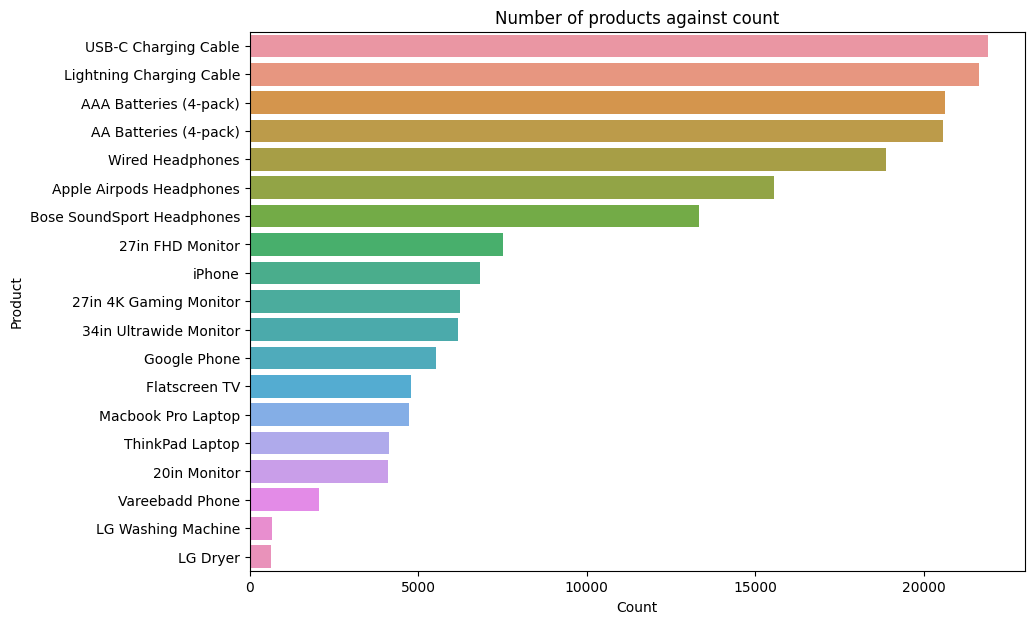

In [99]:
##exploring Product column
product_counts = trans_c['Product'].value_counts()

plt.figure(figsize=(10, 7))  
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Number of products against count')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


- The USB-C Charging Cable stands out as the most frequently sold product, indicating a high demand for this accessory, possibly due to its compatibility with various devices. 
- The Lightning Charging Cable is also highly popular, suggesting a widespread use among users of Apple devices.  
- Electronic devices like monitors and smartphones, including premium brands like Apple, maintain strong market demand.

## Exploring Quantity ordered Column

**Total quantity ordered**

In [100]:
total_quantity = trans_c['Quantity Ordered'].sum()
print(f"Total Quantity: {total_quantity}")


Total Quantity: 209079


There were a total of 209,079 quantities ordered from January to December 2019.

**The distribution of Quantity Ordered**

Frequency Counts Table:
   Quantity Ordered  Frequency
0                 1     168552
1                 2      13324
2                 3       2920
3                 4        806
4                 5        236
5                 6         80
6                 7         24
7                 8          5
8                 9          3


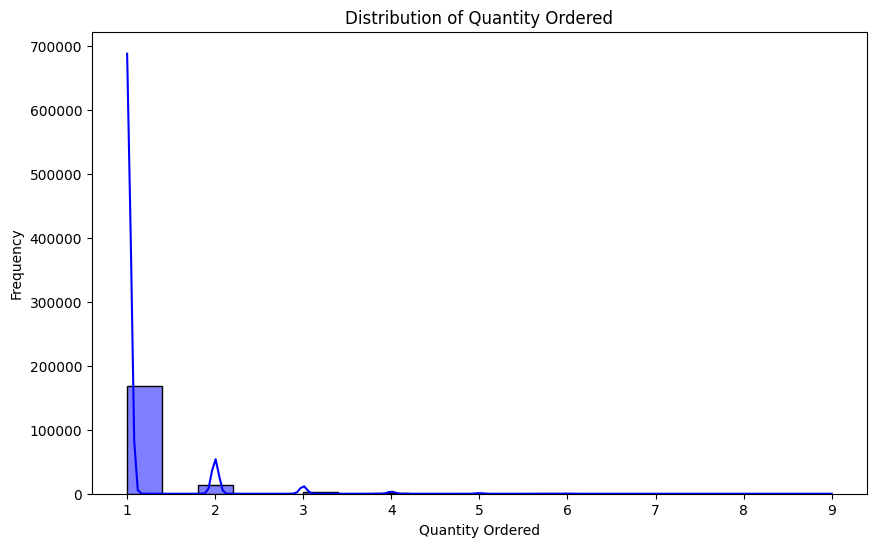

In [148]:
# Calculate frequency counts
quantity_counts = trans_c['Quantity Ordered'].value_counts().reset_index()
quantity_counts.columns = ['Quantity Ordered', 'Frequency']

# Display the frequency counts table
print("Frequency Counts Table:")
print(quantity_counts)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Histogram of Quantity Ordered
sns.histplot(trans_c['Quantity Ordered'], bins=20, kde=True, color='blue')
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')

plt.show()

The frequency counts table and graph for the 'Quantity Ordered' column revealed the distribution of order quantities in the dataset. The majority of orders consist of a single item (Quantity Ordered = 1), representing a significant portion of the dataset with 168,552 occurrences. As the quantity ordered increases, the frequency decreases, indicating that larger order quantities are less common. 

**Exploring the City Column**

### Number of cities

In [101]:
number_city=trans_c["City"].nunique()

print(f"Number of Cities: {number_city}")

Number of Cities: 9


### The names of the cities

In [102]:
## let's know the exact cities
city_count = trans_c["City"].value_counts()
city_count

City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64

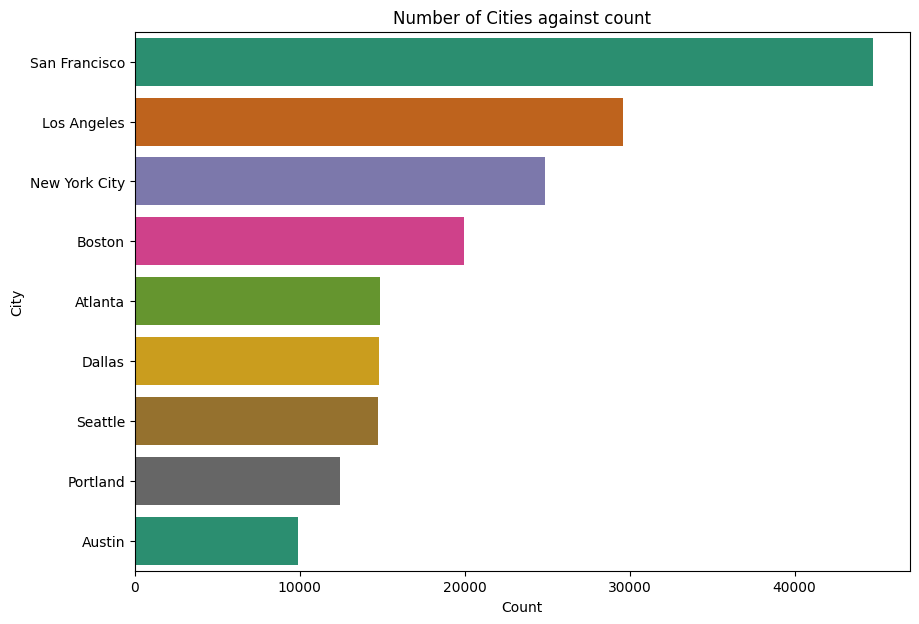

In [103]:
##exploring city column
city_counts = trans_c['City'].value_counts()

plt.figure(figsize=(10, 7))  
sns.barplot(x=city_counts.values, y=city_counts.index, palette='Dark2')
plt.title('Number of Cities against count')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


This chart presents the volume of transactions for each respective city in the dataset. It provides insights into the distribution of business or activity across different cities, with San Francisco having the highest transaction count and Austin the lowest among the listed cities.

**The distribution of Price Each**

This analysis provides an overview of the distribution of prices and their occurrences in the dataset.

Frequency Counts Table for Price Each:
     Price Each  Frequency
0    150.000000      15549
1     11.950000      11951
2     14.950000      11745
3      2.990000      11256
4      3.840000      11160
5     11.990000      10224
6     11.950000       9952
7     14.950000       9913
8      3.840000       9417
9      2.990000       9385
10    11.990000       8658
11    99.989998       7233
12   700.000000       6842
13   600.000000       6837
14    99.990000       6092
15   300.000000       4800
16  1700.000000       4724
17   149.990005       4028
18   149.990000       3479
19   389.989990       3458
20   379.989990       3283
21   379.990000       2898
22   389.990000       2772
23   109.989998       2272
24   999.989990       2216
25   400.000000       2065
26   999.990000       1912
27   109.990000       1829


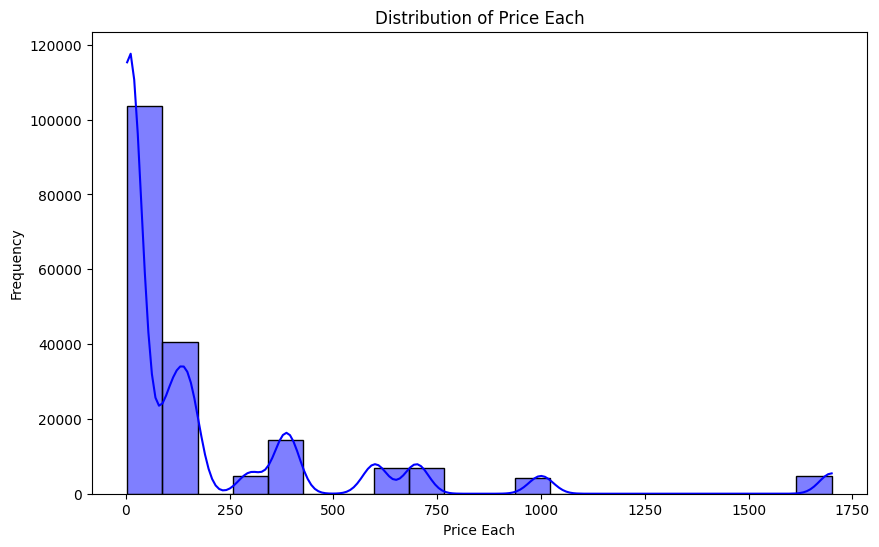

In [147]:
# Calculate frequency counts for Price Each
price_counts = trans_c['Price Each'].value_counts().reset_index()
price_counts.columns = ['Price Each', 'Frequency']

# Display the frequency counts table
print("Frequency Counts Table for Price Each:")
print(price_counts)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Histogram of Price Each
sns.histplot(trans_c['Price Each'], bins=20, kde=True, color='blue')
plt.title('Distribution of Price Each')
plt.xlabel('Price Each')
plt.ylabel('Frequency')

plt.show()

The Frequency Counts Table and plot provide information about the distribution of unique prices in the dataset along with the corresponding frequencies. 

The most common price in the dataset is $150.00, occurring 15,549 times. Other common prices include $11.95, $14.95, $2.99, and $3.84, with frequencies ranging from 9,385 to 11,260. Higher-priced items like $700.00 and $1,700.00 also appear in the dataset, but less frequently. 

## Bivariate analysis

Bivariate analysis involves the analysis of two variables simultaneously to understand the relationship between them.

### **Calculating total price or revenue**

In [104]:
## revenue

trans_c['Total Price'] = trans_c['Quantity Ordered'] * trans_c['Price Each']

# Calculate the total price
total_price = trans_c['Total Price'].sum()

print(f'Total Price: ${total_price:.2f}')


Total Price: $34492035.88


### **Revenue  by product**

**Top 5 products with highest revenue**

In [105]:
# Group by product and sum the total price
revenue_by_product = trans_c.groupby('Product')['Total Price'].sum().reset_index()


In [106]:
# Sort the products by total revenue
revenue_by_product = revenue_by_product.sort_values(by='Total Price', ascending=False)
revenue_by_product

Product   Total Price
13          Macbook Pro Laptop  8.037600e+06
18                      iPhone  4.794300e+06
14             ThinkPad Laptop  4.129959e+06
9                 Google Phone  3.319200e+06
1       27in 4K Gaming Monitor  2.435098e+06
3       34in Ultrawide Monitor  2.355558e+06
6     Apple Airpods Headphones  2.349150e+06
8                Flatscreen TV  1.445700e+06
7   Bose SoundSport Headphones  1.345565e+06
2             27in FHD Monitor  1.132425e+06
16             Vareebadd Phone  8.272000e+05
0                 20in Monitor  4.541487e+05
11          LG Washing Machine  3.996000e+05
10                    LG Dryer  3.876000e+05
12    Lightning Charging Cable  3.470941e+05
15        USB-C Charging Cable  2.865012e+05
17            Wired Headphones  2.464784e+05
4        AA Batteries (4-pack)  1.061184e+05
5       AAA Batteries (4-pack)  9.274083e+04

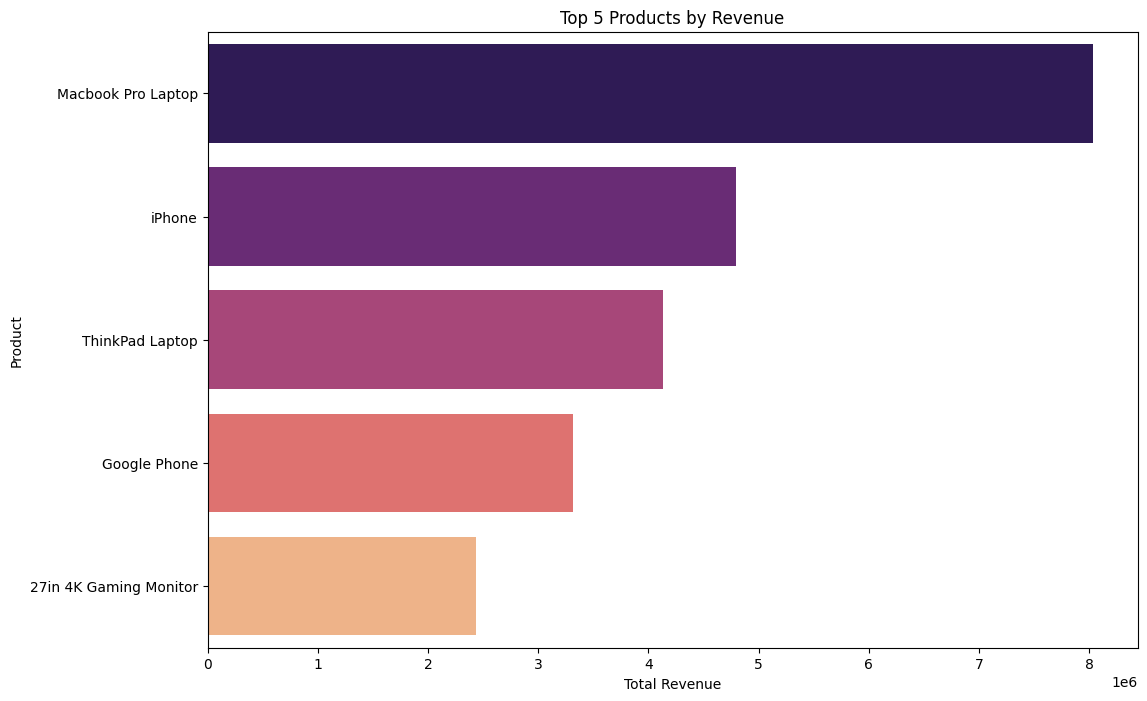

In [107]:
# Plot the top N products by revenue
top_products = 5 # Change this to the desired number of top products
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Price', y='Product', data=revenue_by_product.head(top_products), palette='magma')
plt.title(f'Top {top_products} Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

- Macbook Pro Laptop stands out as the top-performing product indicating substantial demand for high-end laptops, especially among professionals and power users, contributing significantly to overall revenue.
- Following closely is iPhone emphasizing its popularity and likely premium pricing, making it a key driver of revenue. 
- Another laptop, the ThinkPad, secures a notable position, suggesting that laptops, in general, are among the primary contributors to total revenue. The Google Phone emerges as a top-performing mobile device, highlighting its popularity and significant contribution to overall revenue, indicating consumer preference.
- Rounding out the top 5 is the 27in 4K Gaming Monitor, reflecting a demand for high-quality displays, particularly among gamers or professionals with requirements for high-resolution monitors.


**Top 5 products with lowest revenue**

In [108]:
# Sort the products by total revenue in ascending order
revenue_by_products = revenue_by_product.sort_values(by='Total Price')
revenue_by_products

Product   Total Price
5       AAA Batteries (4-pack)  9.274083e+04
4        AA Batteries (4-pack)  1.061184e+05
17            Wired Headphones  2.464784e+05
15        USB-C Charging Cable  2.865012e+05
12    Lightning Charging Cable  3.470941e+05
10                    LG Dryer  3.876000e+05
11          LG Washing Machine  3.996000e+05
0                 20in Monitor  4.541487e+05
16             Vareebadd Phone  8.272000e+05
2             27in FHD Monitor  1.132425e+06
7   Bose SoundSport Headphones  1.345565e+06
8                Flatscreen TV  1.445700e+06
6     Apple Airpods Headphones  2.349150e+06
3       34in Ultrawide Monitor  2.355558e+06
1       27in 4K Gaming Monitor  2.435098e+06
9                 Google Phone  3.319200e+06
14             ThinkPad Laptop  4.129959e+06
18                      iPhone  4.794300e+06
13          Macbook Pro Laptop  8.037600e+06

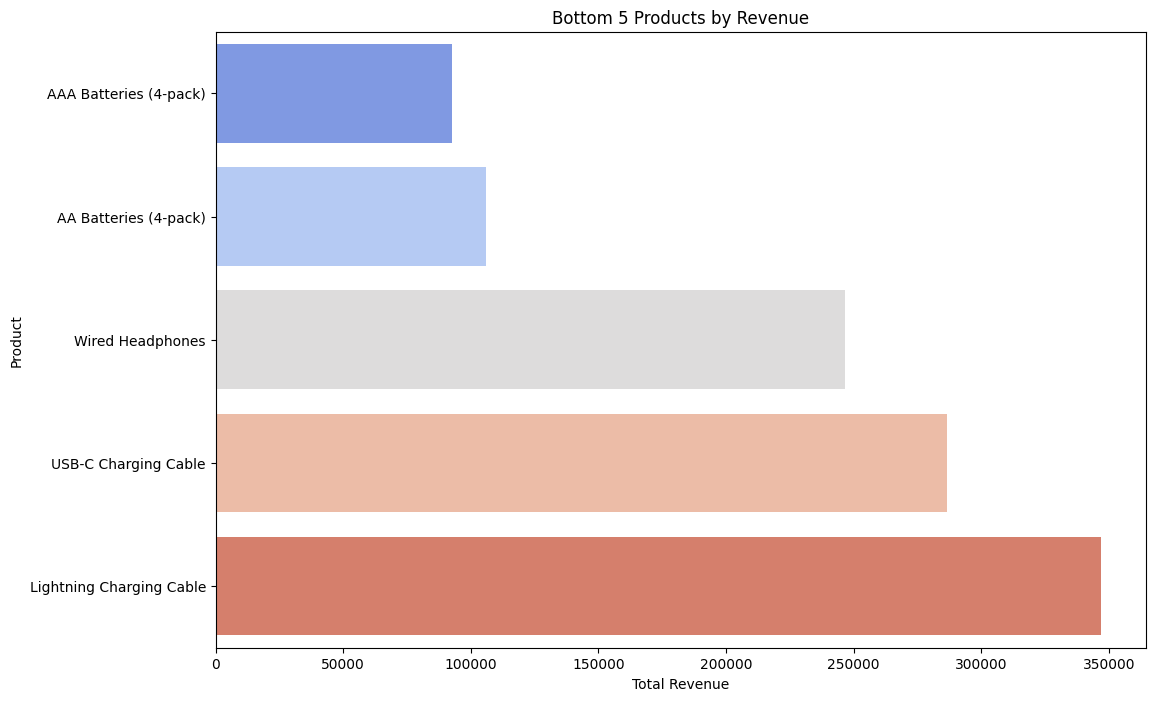

In [109]:
# Plot the bottom N products by revenue
bottom_products = 5  # Change this to the desired number of bottom products
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Price', y='Product', data=revenue_by_products.head(bottom_products), palette='coolwarm')
plt.title(f'Bottom {bottom_products} Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

**Observations:**

AAA Batteries have the lowest revenue among the listed products, possibly due to their lower price point compared to electronic devices. Similar to AAA Batteries, AA Batteries generate relatively low revenue, likely due to their utility nature and lower individual cost. 

### Products with highest quantity ordered

In [110]:

# Group by product and calculate the sum of quantity ordered
top_products_by_quantity = trans_c.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the data by quantity ordered in descending order
top_products_by_quantity = top_products_by_quantity.sort_values(by='Quantity Ordered', ascending=False)

# Select the top 5 products
top_5_products = top_products_by_quantity.head(5)
top_5_products


Product  Quantity Ordered
5     AAA Batteries (4-pack)             31017
4      AA Batteries (4-pack)             27635
15      USB-C Charging Cable             23975
12  Lightning Charging Cable             23217
17          Wired Headphones             20557

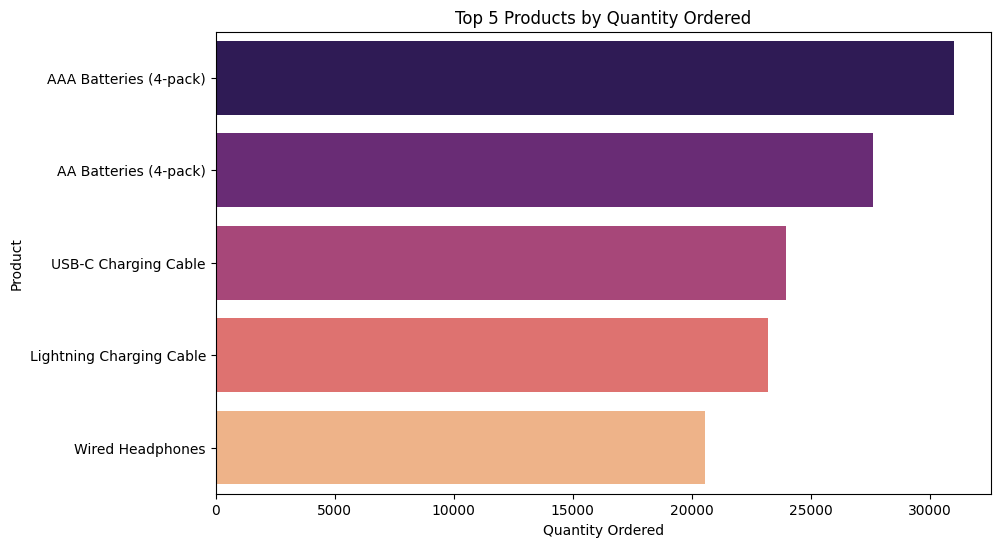

In [111]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity Ordered', y='Product', data=top_5_products, palette='magma')
plt.title('Top 5 Products by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


**Observations:**

- AAA Batteries are highly popular, with a significant quantity of 31,017 units ordered. This suggests a consistent demand for these batteries, possibly due to their common use in various electronic devices.
- AA Batteries also show a substantial demand, with 27,635 units ordered. Similar to AAA Batteries, this indicates that customers frequently purchase these batteries, likely due to their universal application.
- The USB-C Charging Cable is in high demand, with 23,975 units ordered. This could be indicative of the widespread use of devices compatible with USB-C ports, making these cables a popular accessory.
- The Lightning Charging Cable, designed for Apple devices, also demonstrates a strong demand, with 23,217 units ordered. This reflects the popularity of Apple products and the need for compatible accessories.
- Wired Headphones show a considerable quantity of 20,557 units ordered. While this may be lower than some other items, it suggests a steady demand for traditional wired headphones, despite the growing popularity of wireless alternatives.



### Products with lowest quantity ordered

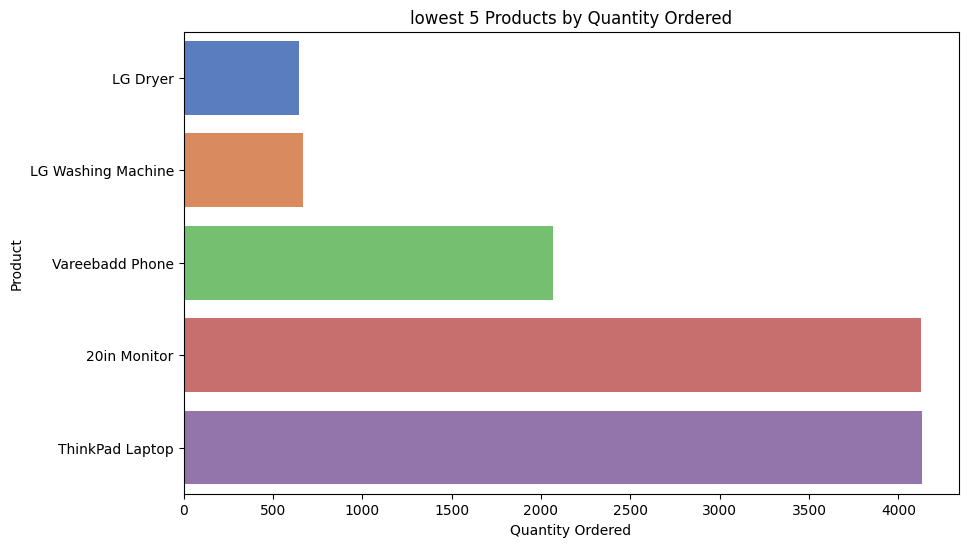

In [112]:

# Group by product and calculate the sum of quantity ordered
lowest_products_by_quantity = trans_c.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the data by quantity ordered in descending order
lowest_products_by_quantity = lowest_products_by_quantity.sort_values(by='Quantity Ordered')

# Select the top 5 products
lowest_5_products = lowest_products_by_quantity.head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity Ordered', y='Product', data=lowest_5_products, palette='muted')
plt.title('lowest 5 Products by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


**Observations:**

- The lowest quanity ordered is LG dryer followed by LG Washing Machine. LG Dryer and LG Washing Machine are larger appliances and may cater to a specific market or demographic. These products might be considered more of an investment, leading to lower purchase frequencies compared to smaller, more frequently used items.

- Consumers tend to replace large appliances like dryers and washing machines less frequently than smaller items. Once purchased, these appliances may last for many years, reducing the need for frequent replacements.


#### Cities with the highest quantities ordered

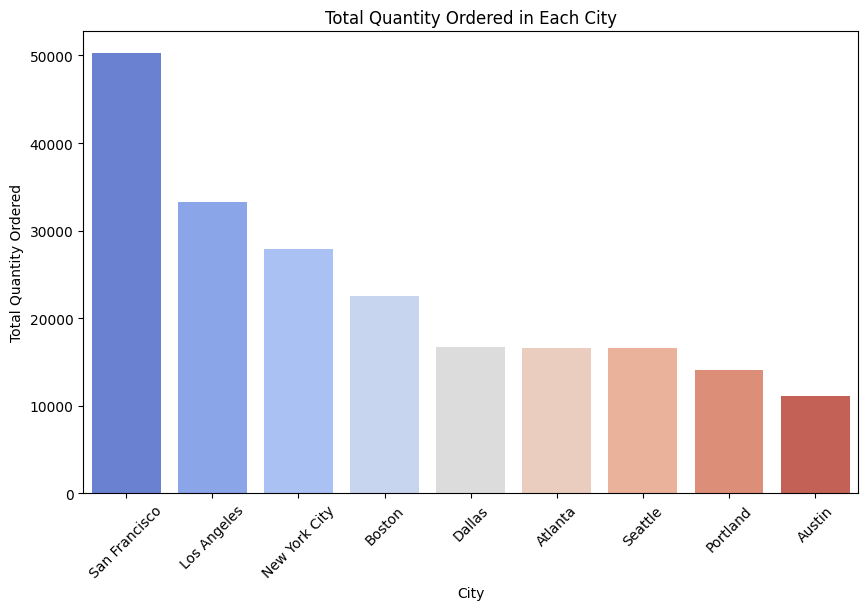

In [149]:
# Group by city and calculate the total quantity ordered in each city
city_quantity = trans_c.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=city_quantity.index, y=city_quantity.values, palette='coolwarm')
plt.title('Total Quantity Ordered in Each City')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


- San Francisco is the top city, reflecting its position with the highest order volumes. 

### Cities with Highest revenue

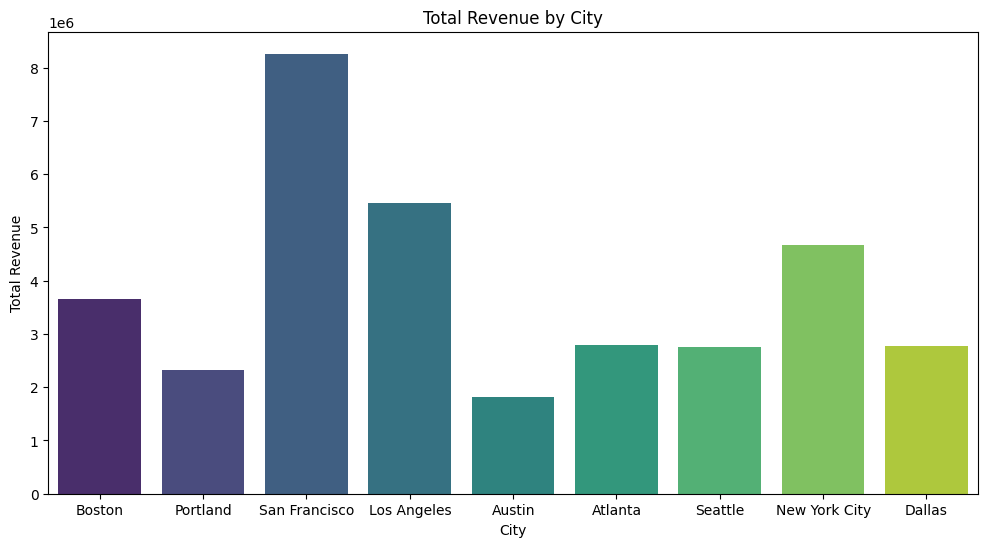

In [114]:

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Price', data=trans_c, ci=None, estimator=sum, palette='viridis')
plt.title('Total Revenue by City')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.show()


### **Observations:**

- San Francisco is a major economic hub, home to many businesses and a thriving tech industry. The high order volumes and revenue may reflect a strong local economy, with residents and businesses actively purchasing goods.
- Cities with higher populations generally have more potential customers, leading to increased order volumes. San Francisco's relatively high population density may contribute to its top position in total quantity ordered and revenue.


###  The distribution of deliveries across cities with respect to different products

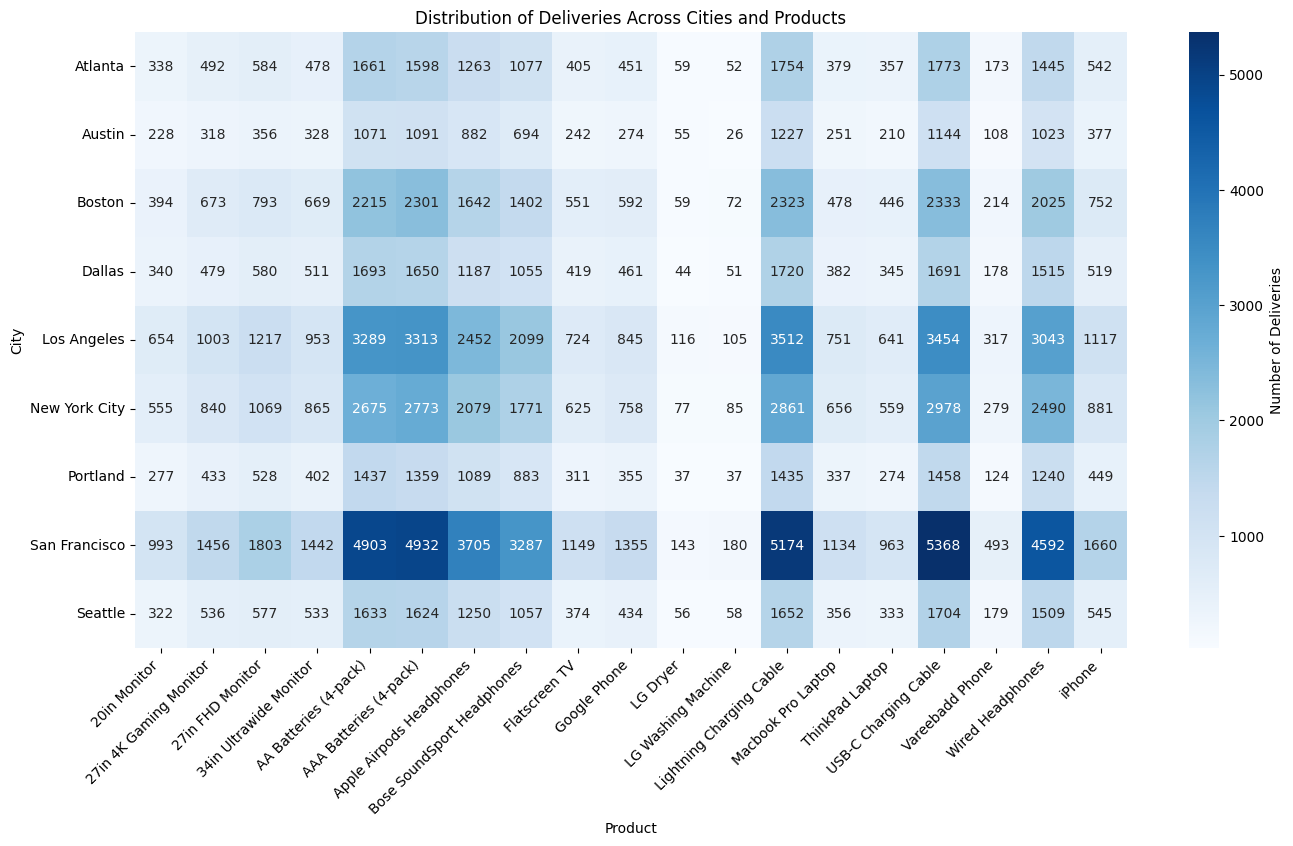

In [115]:
city_product_counts = trans_c.groupby(['City', 'Product']).size().unstack()

# Visualize the distribution of deliveries across cities and products
plt.figure(figsize=(16, 8))
sns.heatmap(city_product_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Deliveries'})
plt.title('Distribution of Deliveries Across Cities and Products')
plt.xlabel('Product')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()


**Observations:**

- San franciso being the city that gives us the highest revenue, has usb-c charging cable being the product with the highest number of deliveries.

- San Francisco is known for its tech industry, and USB-C Charging Cables are commonly used with many electronic devices, especially newer laptops and smartphones. The high demand for these cables could be attributed to the city's tech-savvy population.

- USB-C Charging Cables are commonly used for charging mobile devices and laptops. The observation may reflect a high prevalence of mobile device and laptop usage in San Francisco, contributing to the high demand for these cables.

### Month with highest revenue

The bar plot visually represents the total revenue for each month, providing insights into the revenue trends over time.

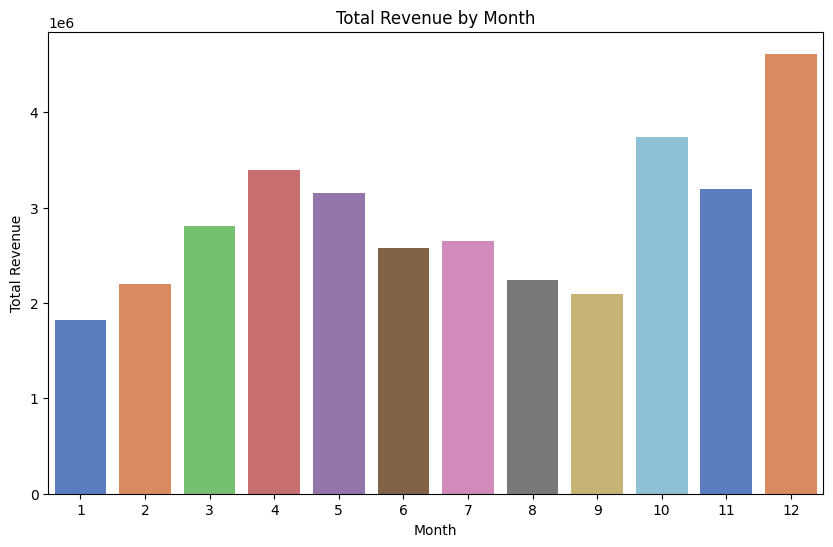

In [116]:
# Extract month from 'Order Date'
trans_c['Month'] = trans_c['Order Date'].dt.month

# Create a bar plot to visualize total revenue by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Price', data=trans_c,estimator=sum, ci=None, palette='muted')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


### **Observations**
- The month of December give the highest revenue over the entire year.

- The fact that December gives the highest revenue suggests that the business experienced a peak in sales during the holiday season. This aligns with common trends across various industries, as December is traditionally a month of increased consumer spending due to holidays and festivities.

### Day with highest quantity ordered

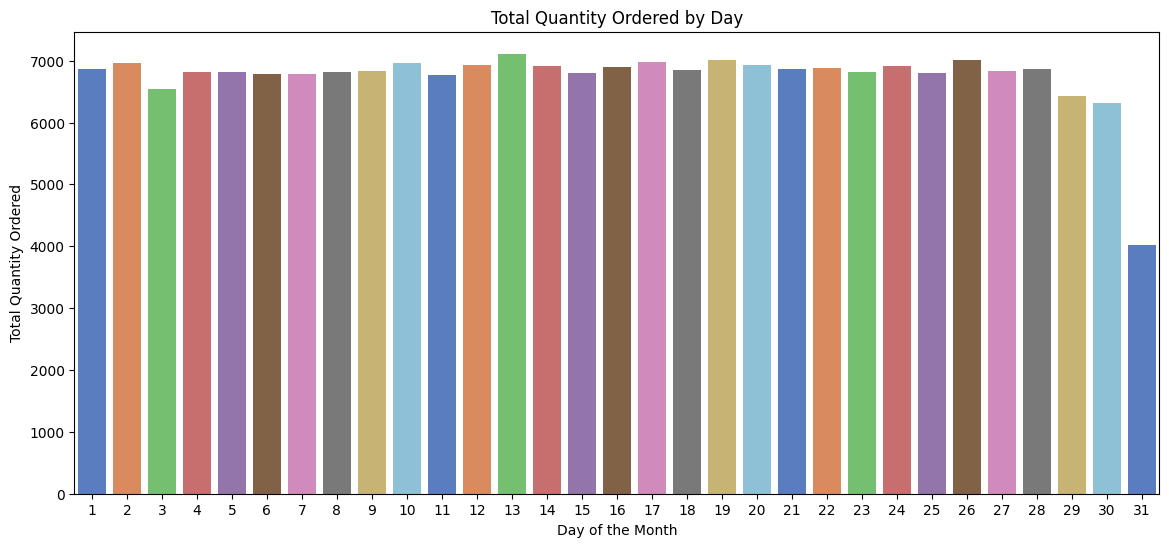

In [117]:
plt.figure(figsize=(14, 6))
sns.barplot(x=trans_c['Order Date'].dt.day, y='Quantity Ordered', data=trans_c, ci=None, estimator=sum, palette='muted')
plt.title('Total Quantity Ordered by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Total Quantity Ordered')
plt.show()


### **Observations:**
- On the 13th of every month there is an increase in quantity ordered.

- Businesses often run promotions or offer discounts on specific dates. If there's a recurring promotion on the 13th of each month, it could encourage customers to make purchases on that day.

- Depending on local salary cycles, customers may receive their salaries around the 13th, leading to increased purchasing power and a spike in orders.




### we will investigate further to see the quantity of products ordered that day

In [118]:
df_13th = trans_c[trans_c['Order Date'].dt.day == 13]


In [119]:
# Display products and quantity for the 13th day
print(df_13th[['Product', 'Quantity Ordered']])


                           Product  Quantity Ordered
44      Bose SoundSport Headphones                 1
82              Macbook Pro Laptop                 1
109                       LG Dryer                 1
167       Lightning Charging Cable                 1
194       Apple Airpods Headphones                 1
204         27in 4K Gaming Monitor                 1
261     Bose SoundSport Headphones                 1
277                         iPhone                 1
290                         iPhone                 1
302     Bose SoundSport Headphones                 1
340               Wired Headphones                 1
341               27in FHD Monitor                 1
347         AAA Batteries (4-pack)                 1
378               27in FHD Monitor                 1
411               Wired Headphones                 1
434         AAA Batteries (4-pack)                 1
453                Vareebadd Phone                 1
484          AA Batteries (4-pack)            

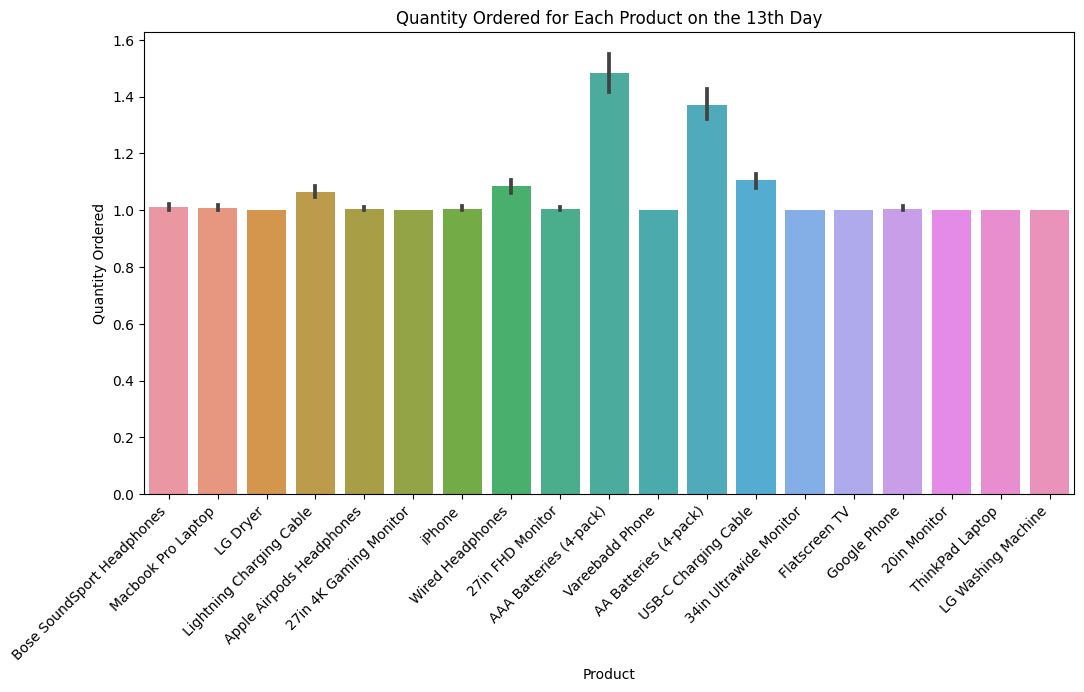

In [120]:
# Bar plot for quantity ordered on the 13th day
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity Ordered', data=df_13th)
plt.xticks(rotation=45, ha='right')
plt.title('Quantity Ordered for Each Product on the 13th Day')
plt.show()


### Observation
- On the 13th there was an increase in the quantity of AAA batteries ordered

## Total Price over time

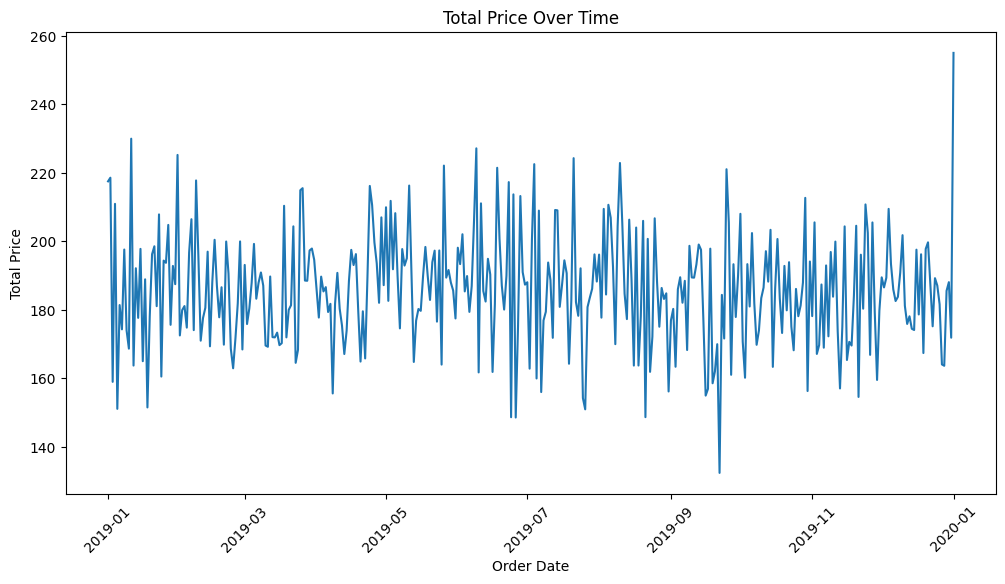

In [121]:
# Create a line plot to visualize total price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Total Price', data=trans_c, ci=None, palette='muted')
plt.title('Total Price Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


### **Observations:**
- There is a presence of seasonality which means various seasons affects the prices in various months in the dataset

- The peaks or valleys in the line indicate periods of higher or lower total prices. There is a high spike in the last month of the year, particularly December which is a common observation and is often associated with increased consumer spending during the holiday season.

- There is also low sales in September which could be influenced by various factors. In many regions, September is associated with the back-to-school season. Families may focus on purchasing school supplies and related items, leading to a shift in spending away from other product categories.
After the summer season, consumer spending patterns may change as people transition from summer vacations to back-to-school and work routines. This transition can impact overall purchasing behavior.

## Quantity Ordered Overtime

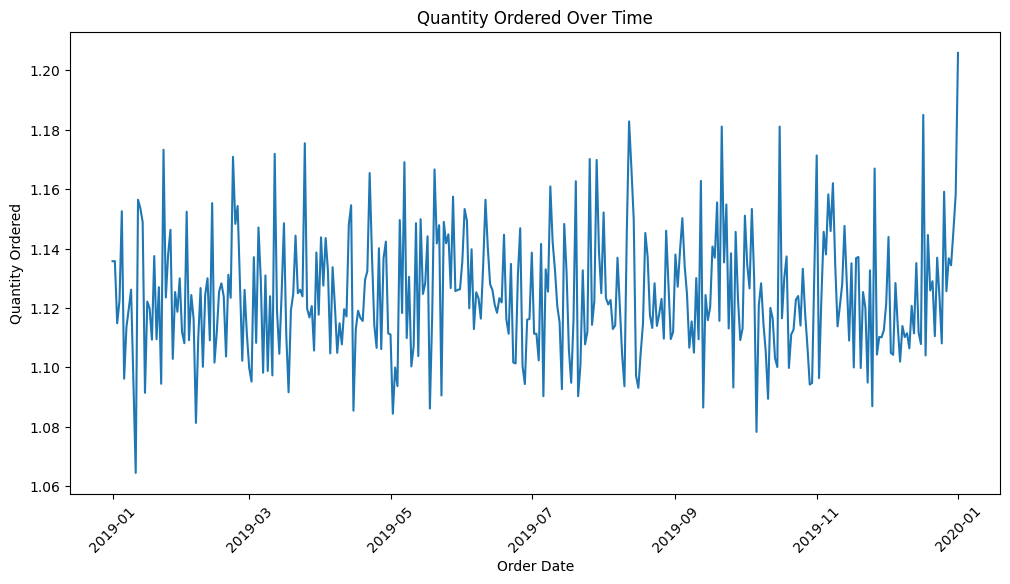

In [122]:
# Create a line plot to visualize total price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Quantity Ordered', data=trans_c, ci=None, palette='muted')
plt.title('Quantity Ordered Over Time')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


### **Observations:**
- At the beginning of every month there is a spike in quantity ordered. We also obsereved a pattern of low quantity ordered in January and high quantity ordered in December.

- The high quantity ordered in December maybe due to the common consumer behavior patterns during the holiday season.
December is a month associated with major holidays, including Christmas. During this time, there is a tradition of gift-giving and increased consumer spending. Many people engage in holiday shopping, leading to a spike in the quantity ordered. 

- The low quantity ordered in January can be attributed to several factors.
After the holiday season, January often experiences a post-holiday lull. Consumer spending tends to decrease as individuals recover from holiday expenses and focus on other priorities, resulting in lower order quantities.

In [151]:
trans_c.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

  Order Date           City  Total Price  Month Product Category  
0 2019-01-22         Boston       700.00      1       High-Level  
1 2019-01-28       Portland        14.95      1      Basic Level  
2 2019-01-17  San Francisco        23.98      1      Basic Level  
3 2019-01-05    Los Angeles       149.99      1       High-Level  
4 2019-01-25         Austin        11.99      1      Basic Level

In [154]:
# Calculate sales or revenue
trans_c['Sales'] = trans_c['Quantity Ordered'] * trans_c['Price Each']

# Display the updated DataFrame
trans_c.head()


Order ID                   Product  Quantity Ordered  Price Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

  Order Date           City  Total Price  Month Product Category   Sales  
0 2019-01-22         Boston       700.00      1       High-Level  700.00  
1 2019-01-28       Portland        14.95      1      Basic Level   14.95  
2 2019-01-17  San Francisco        23.98      1      Basic Level   23.98  
3 2019-01-05    Los Angeles       149.99      1       High-Level  149.99  
4 2019-01-25         Austin        11.99      1      Basic Level   11.99

In [152]:
trans_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   City              185950 non-null  object        
 6   Total Price       185950 non-null  float64       
 7   Month             185950 non-null  int32         
 8   Product Category  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 12.1+ MB


### **Hypothesis Testing**

**Multiple Regression Analysis**

Multiple Regression Analysis assesses the significance of the effects of multiple independent variables (in this case, 'Quantity Ordered' and 'Price Each') on the dependent variable ('Sales'). 


**Null hypothesis (H0):** Quantity Ordered, Price Each have significant effect on Sales

**Alternate hypothesis (H1):** Quantity Ordered, Price Each do not have significant effect on Sales

In [156]:
# Define the independent variables (features)
X = trans_c[['Quantity Ordered', 'Price Each']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable
y = trans_c['Sales']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.126e+07
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:34:58   Log-Likelihood:            -7.4024e+05
No. Observations:              185950   AIC:                         1.480e+06
Df Residuals:                  185947   BIC:                         1.481e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.6628      0.087  

- The coefficients of 'Quantity Ordered'(6.7168) and 'Price Each'(1.0011) represent the estimated impact of each independent variable on 'Sales' when the other variables are held constant. This implies that a one-unit increase in 'Quantity Ordered' is associated with an increase of approximately 6.7168 in 'Sales,' and a one-unit increase in 'Price Each' is associated with an increase of approximately 1.0011 in 'Sales.'

- Both 'Quantity Ordered'(p=0.000) and 'Price Each' (p=0.000) have a statistically significant impact on 'Sales' based on their low p-values. The evidence suggests that changes in both 'Quantity Ordered' and 'Price Each' are associated with changes in 'Sales,' 

- R-squared is 0.998, indicating that approximately 99.8% of the variability in 'Sales' is explained by 'Quantity Ordered' and 'Price Each'. This implies that the model is highly effective in capturing and explaining the observed patterns in 'Sales' based on the chosen independent variables.

**Null Hypothesis (H0):** There is no significant relationship between the type of product and the quantity ordered.
 
**Alternative Hypothesis (H1):** There is a significant relationship between the type of product and the quantity ordered. 

**Hypothesis Testing using ANOVA**

ANOVA can be used if you have more than two levels (categories) of the independent variable (type of product). It assesses whether there are statistically significant differences in the means of the quantity ordered across different levels of the categorical variable.

In [123]:
#hyothesis testing
data = {'Product': trans_c['Product'], 'Quantity Ordered': trans_c['Quantity Ordered']}
df = pd.DataFrame(data)

# Perform ANOVA
result = stats.f_oneway(*[group['Quantity Ordered'] for name, group in df.groupby('Product')])

# Print the result
print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the result
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


ANOVA Result:
F-statistic: 1725.910832908102
P-value: 0.0
Reject the null hypothesis. There is a significant relationship.


- Since the p-value is less than the typical significance level of 0.05 (assuming a 5% significance level), we would reject the null hypothesis. Therefore, we have enough evidence to conclude that there is a significant relationship between the type of product and the quantity ordered.

- This implies that the mean quantity ordered varies significantly across different types of products. In other words, the type of product has a statistically significant impact on the quantity ordered.

## Questions


### 1. How much money did we make this year? 

In [124]:
total_revenue = trans_c['Total Price'].sum()
print(f"Total Revenue for the Year: ${total_revenue:.2f}")


Total Revenue for the Year: $34492035.88


### 2. Can we identify any seasonality in the  sales? 

In [125]:
#calculate monthly sales
monthly_sales = trans_c.resample('M', on='Order Date')['Total Price'].sum()

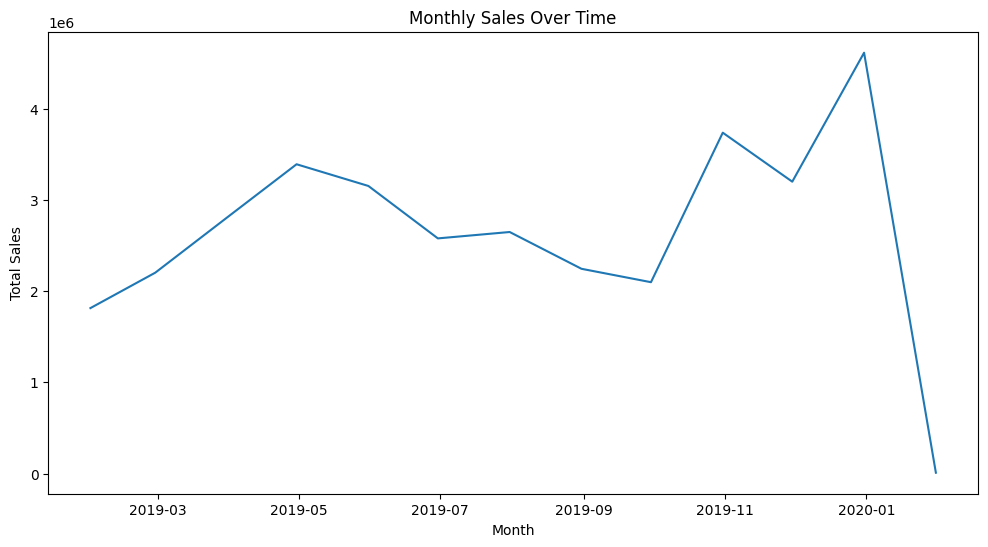

In [126]:
#plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


**Observations:**

- We observed some patterns in the monthly sales over time. The fluctuations in sales, particularly increased in April and also in October 2019. There was a slight drop in November, and a significant spike in December through to January 1st, 2020. These may indeed reflect various factors affecting consumer behavior.

- April and October might have experienced increased sales due to specific seasonal events or trends. The spike in December could be related to holiday shopping and festive season, as it's a common time for increased consumer spending.

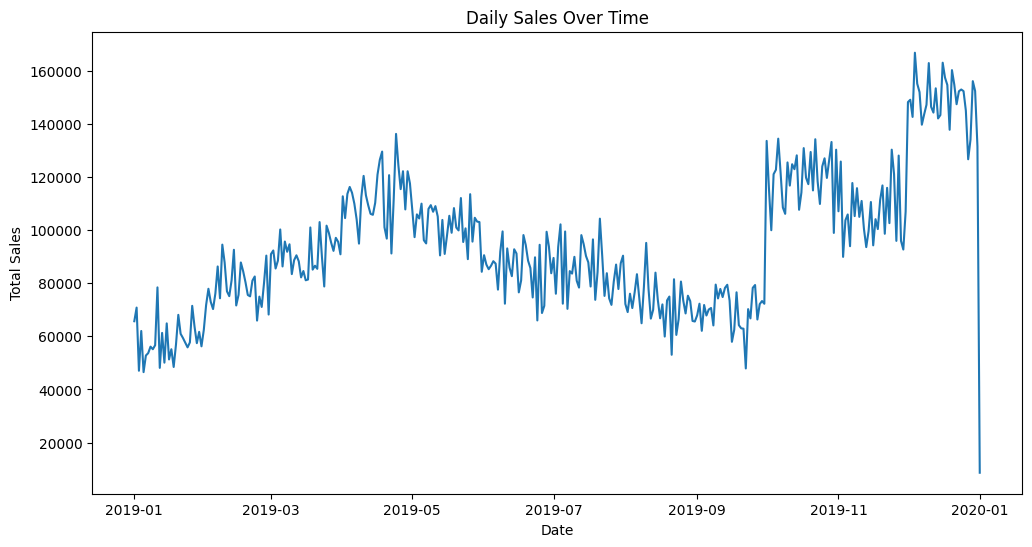

In [127]:
# Create a new DataFrame with resampled data for daily sales
daily_sales = trans_c.resample('D', on='Order Date')['Total Price'].sum()

# Plot the daily sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [128]:
# Create a new DataFrame with resampled data for daily sales
daily_sales = trans_c.resample('D', on='Order Date')['Total Price'].sum().reset_index()

# Plot the daily sales over time using Plotly Express
fig = px.line(daily_sales, x='Order Date', y='Total Price', title='Daily Sales Over Time',
              labels={'Order Date': 'Date', 'Total Price': 'Total Sales'},
              line_shape='linear')

# Show plot
fig.show()


**Observations:**
- We observed some interesting patterns in the daily sales over time. The fluctuations in sales, particularly increased in April and October 2019. There was a slight drop in November, and a significant spike in December through to January 1st, 2020. These may indeed reflect various factors affecting consumer behavior.

- October might have experienced increased sales due to specific seasonal events or trends. The spike in December could be related to holiday shopping and festive season, as it's a common time for increased consumer spending.


### 3. What are our best and worst-selling products? 


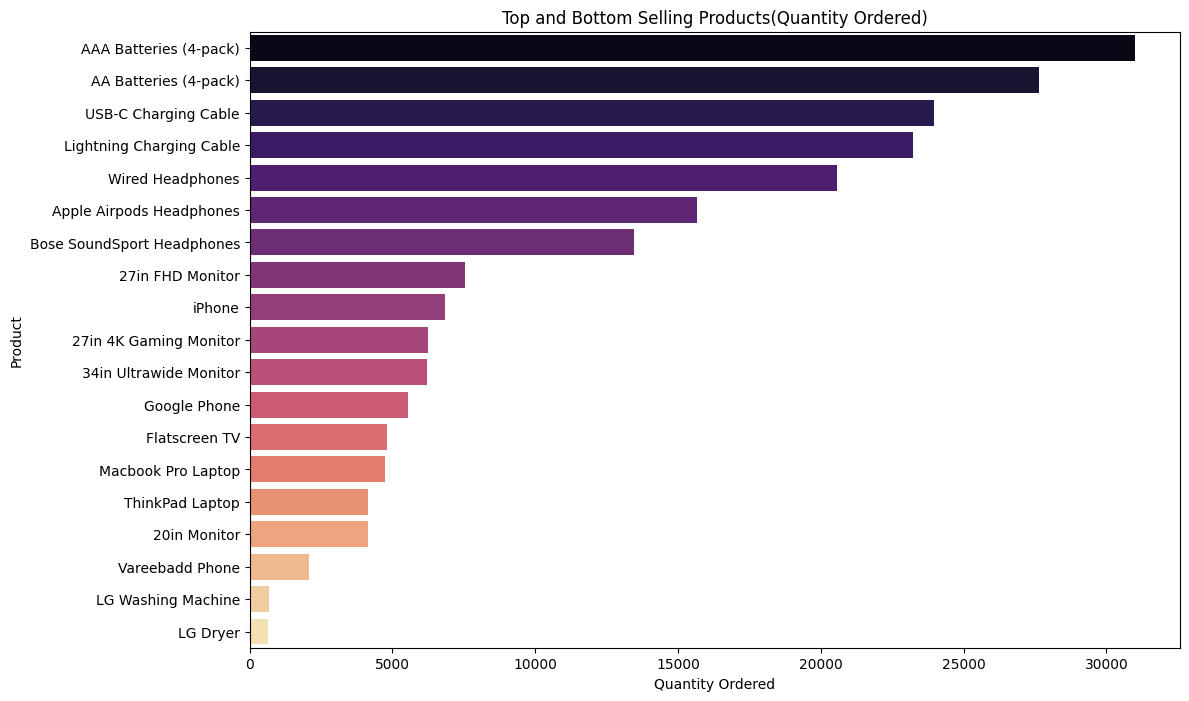

In [129]:
# Group by product and calculate the total quantity ordered
product_quantity = trans_c.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Visualize the top and bottom products
plt.figure(figsize=(12, 8))
sns.barplot(x=product_quantity.values, y=product_quantity.index, palette='magma')
plt.title('Top and Bottom Selling Products(Quantity Ordered)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


- AAA Batteries are highly popular, with a significant quantity of 31,017 units ordered. This suggests a consistent demand for these batteries, possibly due to their common use in various electronic devices.

- The lowest quanity ordered is LG dryer followed by LG Washing Machine. LG Dryer and LG Washing Machine are larger appliances and may cater to a specific market or demographic. These products might be considered more of an investment, leading to lower purchase frequencies compared to smaller, more frequently used items.

- Consumers tend to replace large appliances like dryers and washing machines less frequently than smaller items. Once purchased, these appliances may last for many years, reducing the need for frequent replacements.

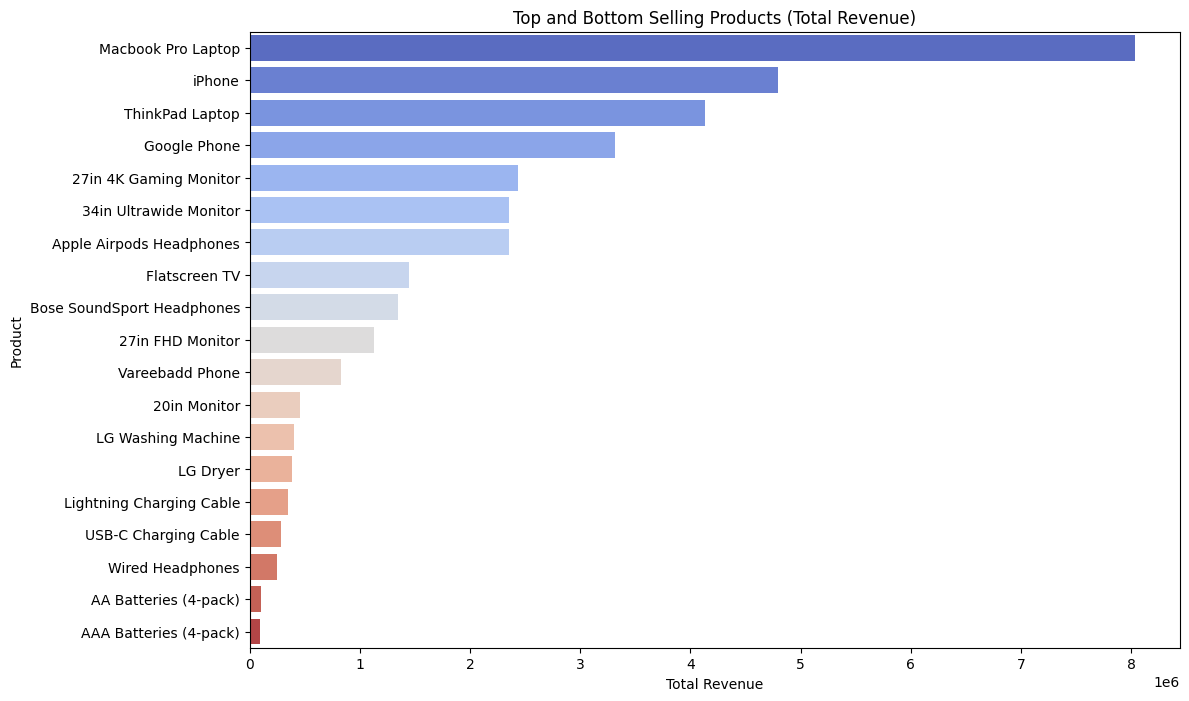

In [130]:
# Group by product and calculate the total revenue
product_revenue = trans_c.groupby('Product')['Total Price'].sum().sort_values(ascending=False)

# Visualize the top and bottom products based on total revenue
plt.figure(figsize=(12, 8))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='coolwarm')
plt.title('Top and Bottom Selling Products (Total Revenue)')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()



### 4. How do sales compare to previous months or weeks? 

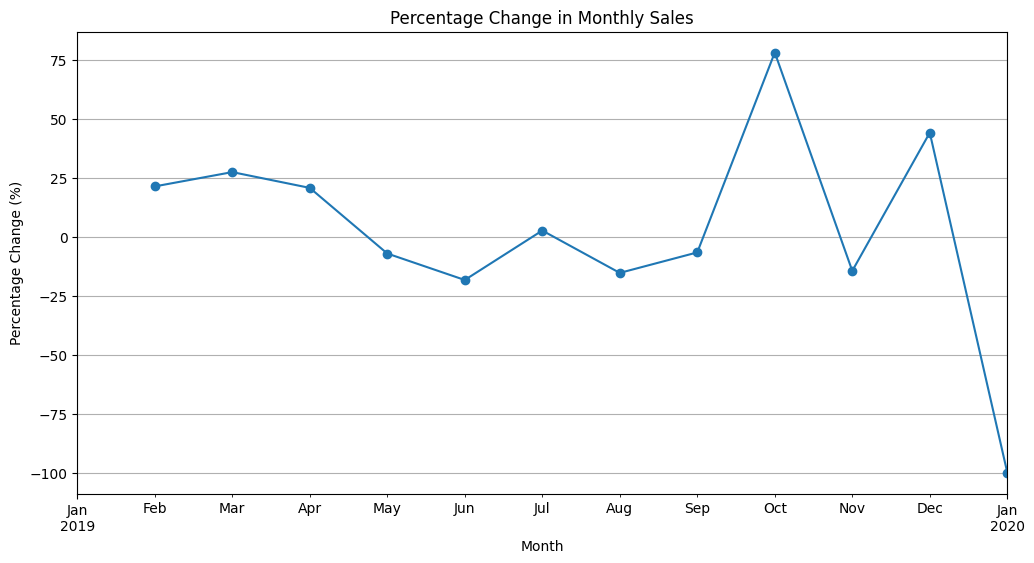

In [131]:
# Calculate monthly sales
monthly_sales = trans_c.resample('M', on='Order Date')['Total Price'].sum()

# Calculate the percentage change in monthly sales
percentage_change = monthly_sales.pct_change() * 100

# Visualize the percentage change over time
plt.figure(figsize=(12, 6))
percentage_change.plot(marker='o')
plt.title('Percentage Change in Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()


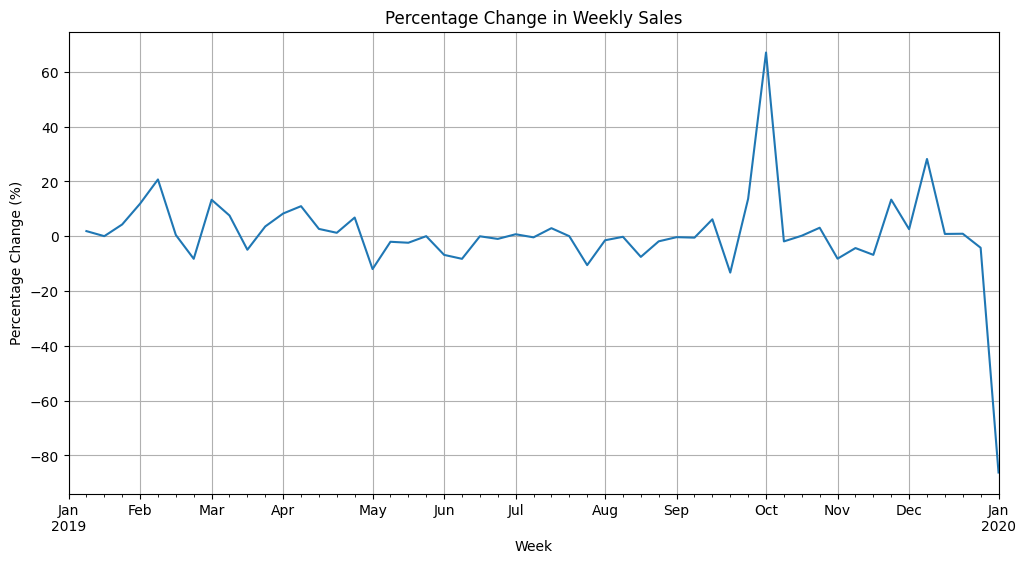

In [132]:

# Calculate weekly sales
weekly_sales = trans_c.resample('W-Mon', on='Order Date')['Total Price'].sum()

# Calculate the percentage change in weekly sales
percentage_change = weekly_sales.pct_change() * 100

# Visualize the percentage change over time
plt.figure(figsize=(12, 6))
percentage_change.plot()
plt.title('Percentage Change in Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()


### **Observations:**

- There is a significant spike in sales during October 2019 which could be due to a surge in demand or a successful marketing campaign. Businesses often experience heightened sales in October, potentially due to factors such as seasonal promotions, product launches, or increased consumer spending in preparation for upcoming holidays. 

- Sales dropped in November 2019 and this might be attributed to various factors, including a potential lull in consumer spending immediately after October promotions or the anticipation of more significant sales events in December, such as Black Friday. 

- Subsequently, sales increased in December which aligns with the holiday season, where customers typically engage in heightened shopping activity, taking advantage of holiday discounts and promotions. 


### 5. Which cities are our products delivered to most? 

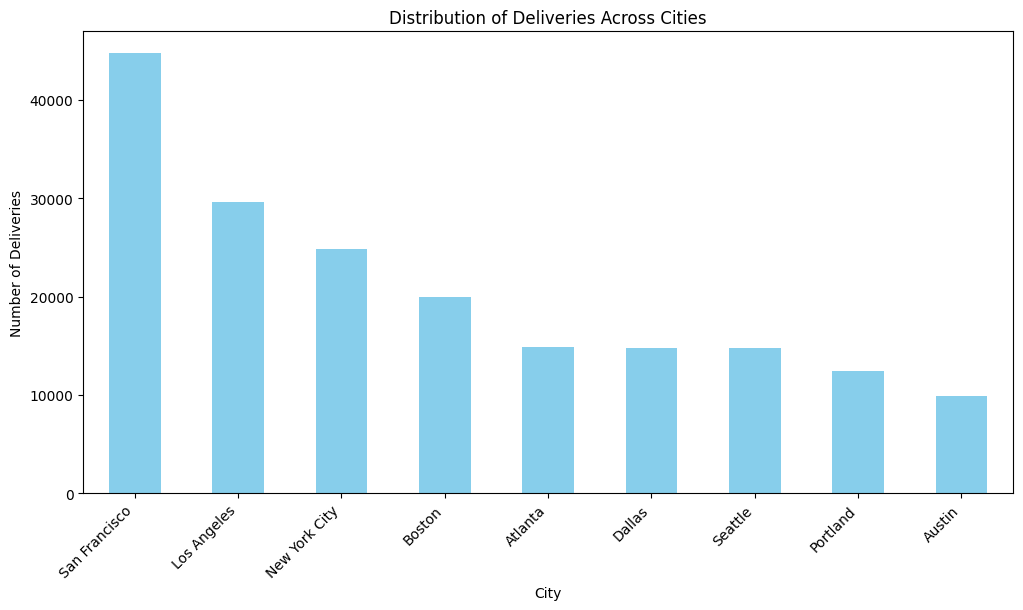

In [133]:
city_counts = trans_c['City'].value_counts()

# Visualize the distribution of deliveries across cities
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Deliveries Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45, ha='right')
plt.show()
 

### **Observations:**

- San Francisco shows the highest number of deliveries, suggesting a strong market presence or a high concentration of customers in this city.
- Los Angeles and New York City also exhibit substantial delivery counts, reinforcing the idea that products are well-received in populous urban centers.

### 6. How do product categories compare in revenue generated and quantities ordered? Products with unit prices above $99.99 should be labelled high-level products  otherwise they should be basic level. 

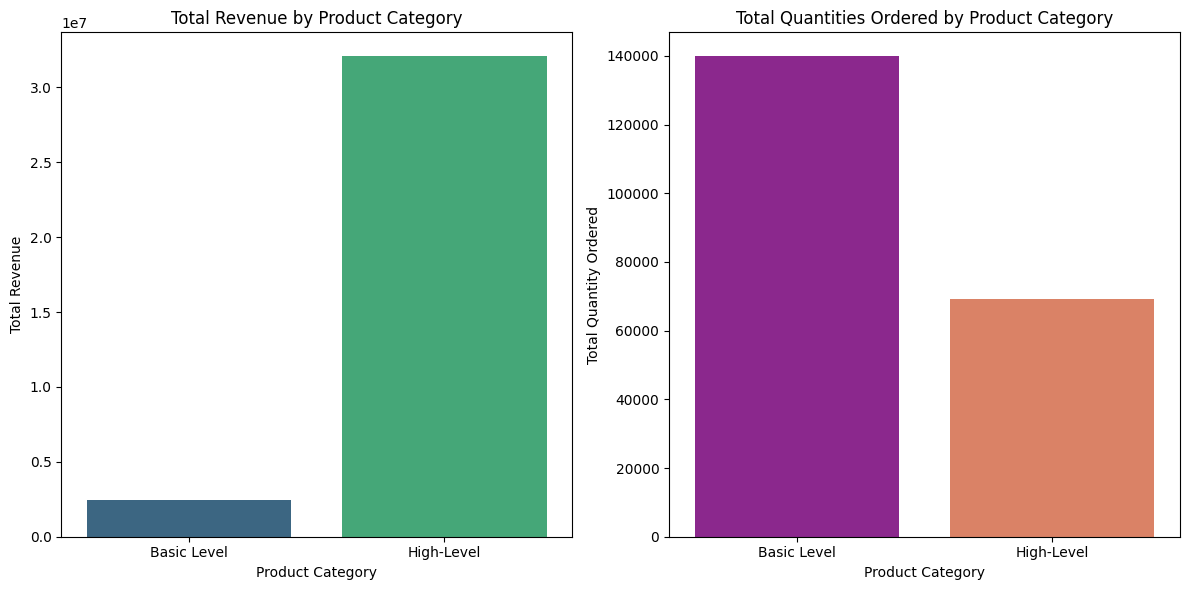

In [160]:
# Calculate total revenue and quantities for each product category
category_revenue = trans_c.groupby('Product Category')['Total Price'].sum()
category_quantity = trans_c.groupby('Product Category')['Quantity Ordered'].sum()

# Plotting side-by-side bar plots for revenue and quantities
plt.figure(figsize=(12, 6))

# Bar plot for revenue
plt.subplot(1, 2, 1)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

# Bar plot for quantities
plt.subplot(1, 2, 2)
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='plasma')
plt.title('Total Quantities Ordered by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Ordered')

plt.tight_layout()
plt.show()


**Observations:**

Total Revenue by Product category

Products categorized as "High-Level" are generating higher revenue compared to the "Basic-Level" category. This indicates that the products within the "High-Level" category, despite potentially having lower quantities ordered, command higher prices or have higher profit margins.

 The higher revenue from the "High-Level" category could be a result of selling premium or high-value products. Customers may be willing to pay more for these products, contributing to increased overall revenue.

Total Quantity Ordered by Product category

Products categorized as "High-Level" are ordered in larger quantities compared to the "Basic-Level" category. This could imply that these products may have broader appeal, are essential or frequently used items, or are simply more popular among customers.

In [138]:
# Display unique products and their corresponding levels
product_levels = trans_c[['Product', 'Product Category']].drop_duplicates()

# Resetting the index
product_levels.reset_index(drop=True, inplace=True)
product_levels

Product Product Category
0                       iPhone       High-Level
1     Lightning Charging Cable      Basic Level
2             Wired Headphones      Basic Level
3             27in FHD Monitor       High-Level
4       AAA Batteries (4-pack)      Basic Level
5       27in 4K Gaming Monitor       High-Level
6         USB-C Charging Cable      Basic Level
7   Bose SoundSport Headphones      Basic Level
8     Apple Airpods Headphones       High-Level
9           Macbook Pro Laptop       High-Level
10               Flatscreen TV       High-Level
11             Vareebadd Phone       High-Level
12       AA Batteries (4-pack)      Basic Level
13                Google Phone       High-Level
14                20in Monitor       High-Level
15      34in Ultrawide Monitor       High-Level
16             ThinkPad Laptop       High-Level
17                    LG Dryer       High-Level
18          LG Washing Machine       High-Level

## Observation
- Our high level products generate a lot of revenue but are ordered in small quantity

## **Conclusions And Recommendations**


## **Conclusions**

Based on the data and analysis made, several key insights have emerged regarding sales performance, product categories, and customer behavior. The year 2019 witnessed a substantial total revenue of $34,492,035.88, showcasing a robust performance for the business.

**Product Categories:**
Regarding the Product Categories, the "High-Level" product category demonstrated noteworthy results, both in terms of quantities ordered and revenue generated. Products falling under this category consistently outperformed the Basic-Level", indicating their popularity and significant contribution to the overall sales figures.

**Top Products by Revenue:**
Concerning Top Products by Revenue, the top five products contributing the highest revenue were identified as:
1. iPhone: $4,794,300
2.  Macbook Pro Laptop: $8,037,600
3. ThinkPad Laptop: $4,129,959
4. Google Phone: $3,319,200
5. 27in 4K Gaming Monitor: $2,435,098 

These products, characterized by their premium nature and likely higher profit margins, played a crucial role in driving overall business success.

**Best and Worst Selling Products:**
Exploring the best and worst selling products, AAA Batteries emerge as the best-selling product and LG Dryer and LG Washing Machine were the worst-selling products. 

**Sales Trends Over Time:**
For Sales Trends Over Time, seasonal patterns were observed in sales, with a significant spike during the holiday season in December. Additionally, a noticeable increase in sales on the 13th of each month suggests potential correlations with promotions or customer behavior.

**Sales by Cities:**
An analysis of sales by cities revealed distinct regional dynamics. San Francisco emerged as a significant contributor to total revenue, reflecting its position with the highest order volumes. 

**Quantity Ordered by Cities:**
San Francisco not only led in total revenue but also had the highest quantity ordered. This observation aligns with its prominent role in driving overall business performance. 

**Multiple Regression Analysis:**
A multiple regression analysis revealed that both "Quantity Ordered" and "Price Each" have statistically significant impacts on sales. The high R-squared value indicates that the model explains a substantial percentage of the variability in sales. 

**Strategic Implications:**

These insights can inform strategic decision-making, guiding inventory management, marketing campaigns, and product development efforts. Understanding customer preferences and capitalizing on high-performing product categories can lead to sustained growth and profitability.

## **Recommendations**

 1.   **Product Strategy:**
        Capitalize on the success of "High-Level" product categories by expanding and innovating within these segments. Identify emerging trends or features that resonate with consumers and align with the premium nature of these products.

 2.   **Top Products Optimization:**
        Given the significant revenue contribution of top products like the Macbook Pro Laptop and iPhone, invest in marketing campaigns that highlight their unique features and value propositions. Consider bundling options or exclusive promotions to further enhance their appeal.

 3.   **Diversification Opportunities:**
        Explore opportunities for diversification within the best-selling and worst-selling product categories. For AAA Batteries, consider introducing variations or bundling options to cater to different customer needs. Assess the market for potential improvements or variations of LG Dryer and LG Washing Machine to increase their appeal.

 4.  **Seasonal Sales Strategies:**
        Leverage the observed seasonal sales trends by implementing targeted marketing strategies during peak months, especially in December. Consider special promotions, discounts, or limited-time offers to maximize customer engagement during these periods.

 5.  **Regional Focus:**
        Given San Francisco's prominent role in total revenue and quantity ordered, tailor marketing efforts to further strengthen the brand presence in this region. Implement location-specific promotions or events to enhance customer loyalty and attract new customers.

 6.   **Inventory and Demand Planning:**
        Use the insights from the quantity ordered analysis to optimize inventory levels. Ensure that high-demand products are adequately stocked, especially during peak seasons. Implement dynamic pricing strategies to balance demand and supply.

  7.  **Customer Engagement:**
        Engage with customers on the 13th of each month by implementing targeted promotions or exclusive deals. This could be tied to a loyalty program or special events, creating a sense of excitement around these dates.

 8.    **Continuous Monitoring and Adaptation:**
        Establish a system for continuous monitoring of sales trends, product performance, and customer preferences. Regularly reassess the market landscape, incorporating new data and insights to adapt strategies and stay responsive to evolving consumer behavior.